## Data Information

### 1. Content
You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

### 2. Stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

### 3. train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

- Store : the store number
- Dept :  the department number
- Date : the week
- Weekly_Sales :  sales for the given department in the given store
- IsHoliday : whether the week is a special holiday week

### 4.test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

### 5. features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

- Store : the store number
- Date : the week
- Temperature : average temperature in the region
- Fuel_Price : cost of fuel in the region
- MarkDown1-5 : anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI : the consumer price index
- Unemployment : the unemployment rate
- IsHoliday : whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Source of Data: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Extraction

In [2]:
df_features = pd.read_csv('./dataset/features.csv')
df_sales = pd.read_csv('./dataset/train.csv')
df_stores = pd.read_csv('./dataset/stores.csv')
df_test = pd.read_csv('./dataset/test.csv')

#### 1.1 Memanggil masing-masing dataframe, untuk memastikan data sudah terload seluruhnya

In [3]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
df_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


> jika di dibandingkan jumlah row dan kolom pada masing-masing dataframe dengan jumlah row dan kolom data pada file aslinya, maka data sudah terload sepenuhnya

#### 1.2 Melakukan pengecekan info dan deskripsi data untuk mengetahui informasi secara umum pada dataframe dan mencari nilai yang null

#####  1.2.1 Cek dataframe features

In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


> Sesuai data informasi sebelumnya, terdapat nilai null pada kolom MarkDown 1,2,3,4,5 dikarenakan memang tidak ada datanya. Juga pada kolom CPI dan Unemployment masih terdapat nilai null. Format data pada kolom Date pun masih berupa object.

In [7]:
df_features.describe().round()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.0,8190.0,8190.0,4032.0,2921.0,3613.0,3464.0,4050.0,7605.0,7605.0
mean,23.0,59.0,3.0,7032.0,3384.0,1760.0,3293.0,4132.0,172.0,8.0
std,13.0,19.0,0.0,9263.0,8794.0,11276.0,6792.0,13087.0,40.0,2.0
min,1.0,-7.0,2.0,-2781.0,-266.0,-179.0,0.0,-185.0,126.0,4.0
25%,12.0,46.0,3.0,1578.0,69.0,7.0,305.0,1441.0,132.0,7.0
50%,23.0,61.0,4.0,4744.0,365.0,36.0,1176.0,2727.0,183.0,8.0
75%,34.0,74.0,4.0,8923.0,2153.0,163.0,3310.0,4833.0,214.0,9.0
max,45.0,102.0,4.0,103185.0,104520.0,149483.0,67475.0,771448.0,229.0,14.0


> jika melihat informasi diatas, terdapat nilai yang cukup aneh pada nilai min Markdown 1-5, yaitu nilainya yang minus. Namun setelah mencoba mencari tahu dari sumber data, tidak terdapat informasi mengenai data tersebut. Sehingga peneliti akan mempertahankan data tersebut untuk sementara.

##### 1.2.2 Cek dataframe sales(training)

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
df_sales.describe().round()

,Store,Dept,Weekly_Sales
count,421570.0,421570.0,421570.0
mean,22.0,44.0,15981.0
std,13.0,30.0,22711.0
min,1.0,1.0,-4989.0
25%,11.0,18.0,2080.0
50%,22.0,37.0,7612.0
75%,33.0,74.0,20206.0
max,45.0,99.0,693099.0


> Tidak terdapat nilai null pada df_sales, namun tipe data pada kolom Date masih berupa object. Namun ada nilai min Weekly_sales dengan nilai minus, maka perlu dicek.

In [109]:
df_sales[df_sales['Weekly_Sales'] < 0].sort_values(by= 'Weekly_Sales')

,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,2010-10-08,-4988.94,False
336495,35,47,2011-09-02,-3924.00,False
417801,45,47,2010-02-26,-1750.00,False
153916,16,47,2012-03-09,-1699.00,False
271300,28,32,2011-03-25,-1321.48,False
...,...,...,...,...,...
97237,10,94,2010-11-12,-0.08,False
177102,18,98,2011-02-25,-0.07,False
287203,30,5,2011-09-09,-0.04,True
145940,15,80,2010-02-05,-0.04,False


> bila peneliti asumsikan kembali, sepertinya tidak ada keanehan pada data yang minus. Nilai minus didapat karena mungkin memang ada beberapa departement di wallmart yang tidak dapat menjual produknya sampai batas waktu tertentu (seperti kadaluarsa) dan atau terjadi tindakan lainnya (seperti tindak kriminal pencurian, barang rusak, dsb) yang sehingga menyebabkan kerugian. Penarikan asusmsi tersebut didasari oleh explorasi data yang menunjukan kerugian tertinggi muncul pada kelas-kelas tertentu saja. Tentu asumsi ini dapat diperkuat dengan informasi lebih lanjut mengenai informasi departemen pada masing-masing kode departemen yang tidak terdeskripsikan pada informasi data dan juga informasi lainnya yang peneliti coba untuk mencarinya.

##### 1.2.3 Cek dataframe stores

In [11]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


> Dari keterangan diatas, pada df_stores jumlah dan tipe datanya sudah sesuai, maka tidak perlu dilakukan perubahan.

## 2. Preprocessing Data
#### 2.1 Mengubah tipe data kolom Date dan melakukan Merging Dataframe
> jika dilihat seksama, terdapat sebuah bounding/hubungan antara ketiga dataframe diatas yang dimana dataframe stores, sales, dan features terikat oleh satu key yaitu kolom Store dan Date. Untuk mempermudah dalam pencarian Informasi lebih lanjut, maka perlu dilakukan merging pada ketiga dataframe tersebut. Namun sebelumnya kita perlu mengubah tipe data Date pada dataset feature dan sales.

In [12]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [13]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_features['Date']

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
8185   2013-06-28
8186   2013-07-05
8187   2013-07-12
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

In [14]:
df=pd.merge(df_sales,df_features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,df_stores, on=['Store'], how='left')
df.head(50)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

> Masih terdapat data null pada kolom markdown 1-5 maka peneliti akan mengisi datanya. Dikarenakan memang ada ketentuan pada informasi data bahwa markdown baru tersedia dari november 2011 dan markdown hanya terdapat data beberapa store saja, maka peneliti akan mengisinya dengan nilai 0.

#### 2.2 Melakukan pengisian data yang null

In [16]:
df.fillna(0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

> Dari informasi diatas, dataset hasil merging sudah tidak memiliki data null

#### 2.3 Mengecek data yang duplikat

In [18]:
print('data duplicated:{}'.format(df.duplicated().sum()))

data duplicated:0


> dataframe sudah siap untuk digunakan.

## 3. EDA (Exploratory Data Analysis)

### Melihat korelasi setiap kolom/fitur terhadap kolom Weekly_Sales

In [19]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


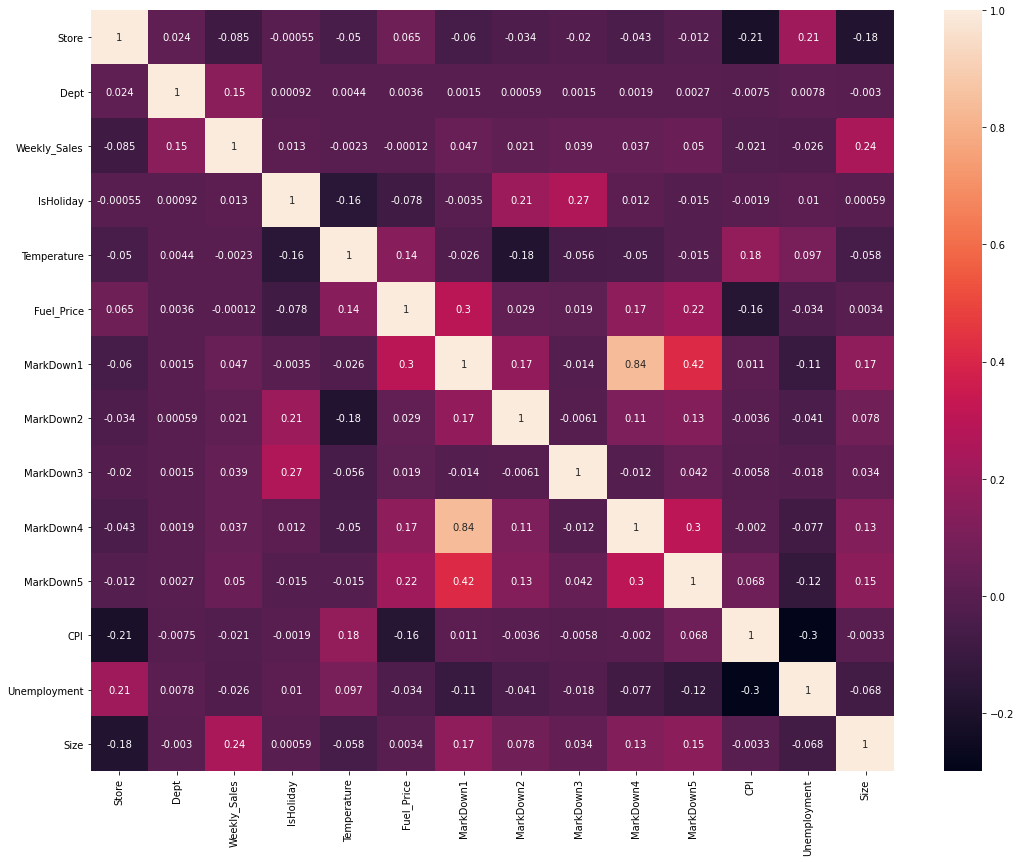

In [20]:
fig = plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True)

In [21]:
print(df.corr()['Weekly_Sales'].sort_values(ascending=False))

Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64


> Dari informasi data korelasi diatas, dapat diasumsikan tidak ada kolom yang benar-benar kuat dalam mempengaruhi nilai pada kolom Weekly_Sales

In [22]:
def scatter(df, column):
    plt.figure()
    plt.scatter(df[column] , df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

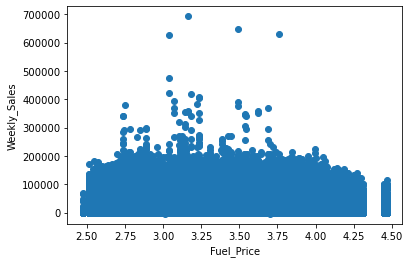

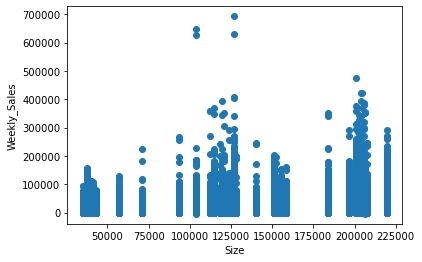

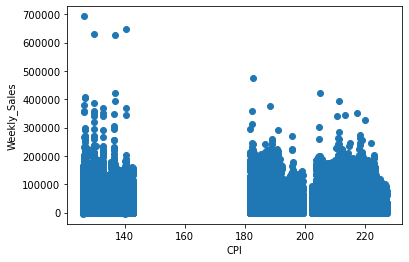

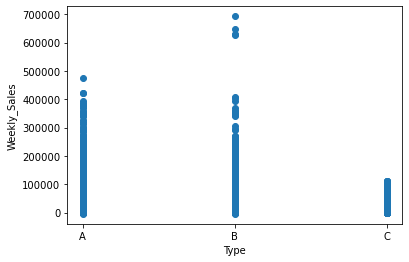

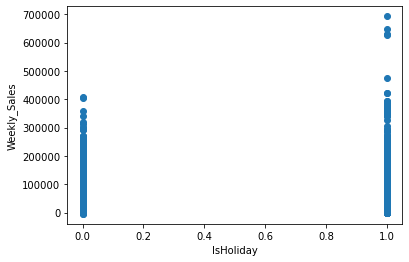

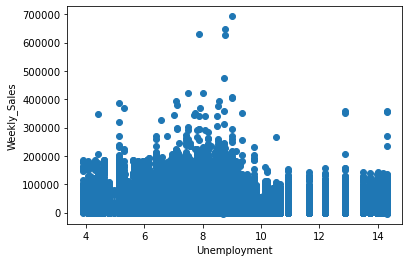

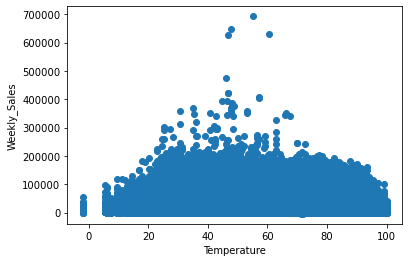

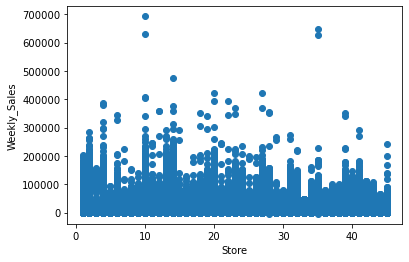

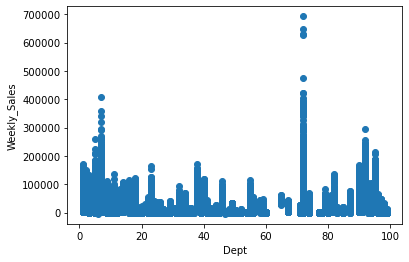

In [23]:
scatter(df, 'Fuel_Price')
scatter(df, 'Size')
scatter(df, 'CPI')
scatter(df, 'Type')
scatter(df, 'IsHoliday')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')
scatter(df, 'Store')
scatter(df, 'Dept')

> Sekali lagi jika dilihat melalui 2 plot diatas, jika kita lihat sebaran datanya, tidak ada fitur atau kolom tertentu yang benar-benar mempengaruhi nilai Weekly_Sales. Bahkan korelasi antar Weekly_Sales dan Store yang dimana dapat diasumsikan sebagai lokasi toko pun terlihat hampir sama, yang dimana menunjukan tidak ada toko yang terlalu dominan menguasai angka penjualan. Lalu hari libur pun tidak terlalu meningkatkan penjualan signifikan. Berdasarkan implementasi 2 plot diatas, dapat diasumsikan bahwa kolom Weekly_Sales adalah variable bebas dan dapat digunakan sebagai fitur modelling ARIMA yand dimana menggunakan data univariate.

## 4. Feature Engineering

In [110]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [24]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

In [25]:
df_average_sales_week

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [26]:
#Best top10 weekly dataset
top10 = df_average_sales_week.sort_values(by='Weekly_Sales', ascending=False).head(10)
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 46 to 126
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   Weekly_Sales  10 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


Text(0.5, 1.0, 'Top 10 Weekly Sale')

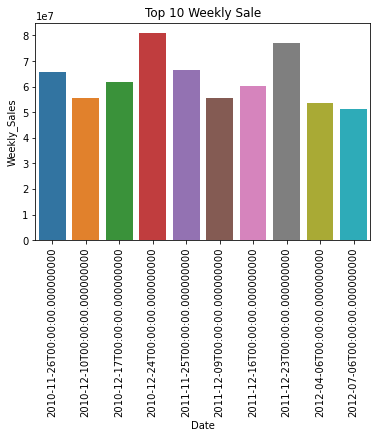

In [28]:
#Best top10 weekly sales
ax = sns.barplot(x='Date', y='Weekly_Sales', data=top10)
#ax = sns.barplot(x=top10.index.strftime("%d-%m-%Y"), y='Weekly_Sales', data=top10)
plt.xticks(rotation = 90)
plt.title('Top 10 Weekly Sale')

In [29]:
df_forecast = df_average_sales_week
df_forecast.set_index('Date', inplace=True)
df_forecast

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [30]:
y = df_forecast['Weekly_Sales'].resample('W').mean()

In [31]:
y.head()

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
Freq: W-SUN, Name: Weekly_Sales, dtype: float64

## 5. Modelling

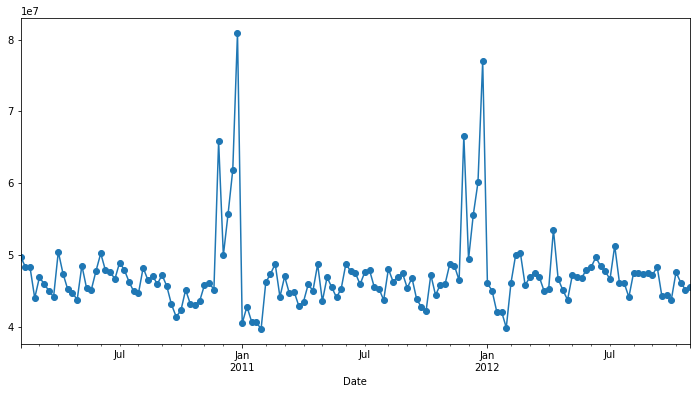

In [32]:
## Ploting untuk melihat pola sebaran data
plt.figure(figsize=(12,6))
y.plot(marker='o')

> jika dilihat dari plot diatas, model yang tepat untuk melakukan decomposisi adalah additive seasonality, karena polanya cenderung stabil tanpa ada peningkatan yang signifikan di tiap periodenya.

In [33]:
## Menguji Dataset Stationery dengan metode Augmentented Dickey Fuller Test
# H0 = Non-Stationary
# H1 = Stationary
#significance level (5%).. 0.05
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: {}'.format(result[0]))
print('P-Value:{}'.format(result[1]))

ADF Statistic: -5.90829795718632
P-Value:2.675979158986205e-07


>jika dilihat dari uji statistik diatas, P-Value < significance level yang artinya bahwa data sudah bersifat stationery. Jadi peneliti akan mencoba melakukan modelling tanpa perlu dilakukan tahapan differencing dan decomposition.

### ARIMA using Original Dataset

### ARIMA MODELING
Auto Regressive Integrated Moving Average
- p is AR (Auto Regressive)
- q is MA (Moving Average)
- d is Integrated

##### AutoCorellation (ACF) Using Original Dataset
- ACF merupakan korelasi antar data di dalam time series yang dipisahkan dalam lag.
- lag adalah fungsi step yang akan ditambahkan pada data, untuk mengetahui nilai korelasinya.
- dari plot acf, kita bisa mengasumsikan bahwa data yang kita gunakan sudah stationery atau belum.

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

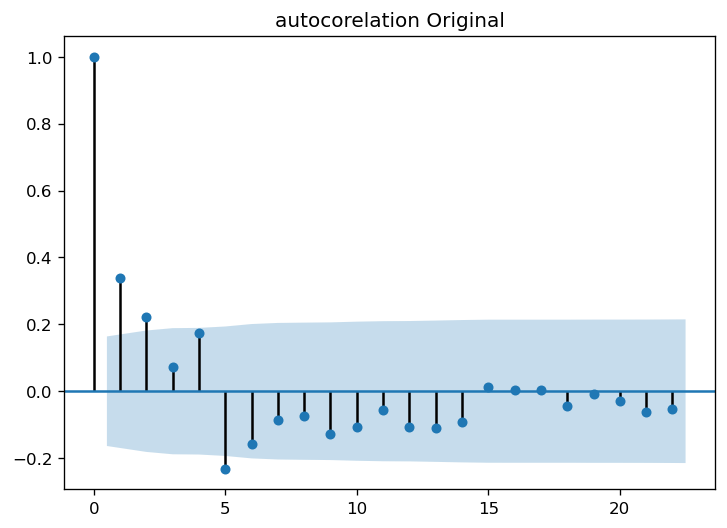

In [35]:
## Original Series
plt.rcParams.update({'figure.figsize':(7,5),'figure.dpi':120})
plot_acf(y,title='autocorelation Original')
plt.show()

> Jika kita lihat plot diatas, lag positif terdapat < 10 titik, yang artinya acf nya sudah cukup baik. ACF pun berpola dying down, dimana lag menurun secara perlahan.

##### Partial AutoCorrelation (PACF) Using Original Dataset
- PACF merupakan fungsi yang mirip dengan ACF, namun jika dalam ACF menggunakan seluruh korelasi seluruh data pada pengolahan fungsinya, dalam PACF hanya menghitung korelasi secara parsial antara nilai t dengan nilai t+k tanpa dipengaruhi nilai nilai diantaranya

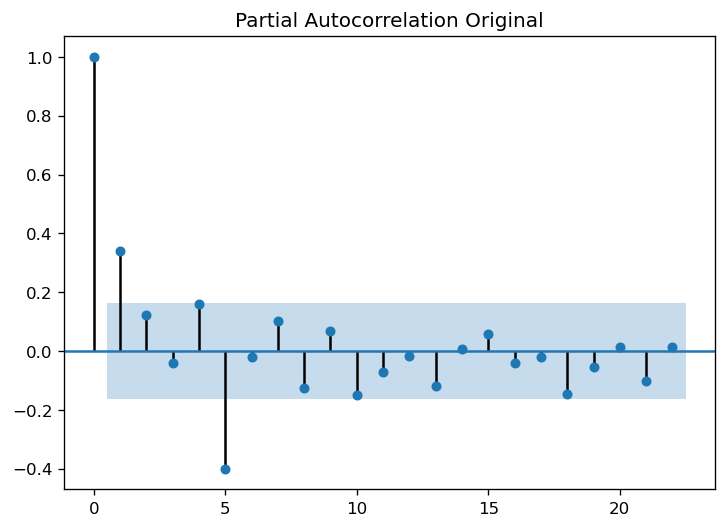

In [36]:
#PACF Plot
plot_pacf(y,title='Partial Autocorrelation Original')
plt.show()

> Jika kita lihat plot diatas, lag positif terdapat < 10 titik, yang artinya pacf-nya juga sudah cukup baik. PACF pun berpola cut off, dimana lag menurun secara drastis yang dimulai pada lag ke-3.

##### Berdasarkan hasil ploting ACF dan PACF diatas dan merujuk definisi yang peneliti dapat dibawah ini (sumber: https://agungbudisantoso.com/arima-sarima-si-kembar-dari-time-series/):
- Jika ACF menunjukkan pola dying down, dan PACF menunjukkan cut off, maka dapat dikatakan model ARIMA berupa AR murni.
- Jika ACF menunjukkan pola cut off, dan PACF menunjukkan dying down, maka dapat dikatakan model ARIMA berupa MA murni.
- Jika ACF dan PACF menunjukkan dying down maka  dapat dikatakan model ARIMA berupa gabungan AR dan MA.
> maka dapat disimpulkan: model yang cocok digunakan untuk data ini adalah model ARIMA dengan AR murni atau p=1

##### Modelling Using ARIMA

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model = ARIMA(y,order=(1,0,0))
model = model.fit()

> model ARIMA yan digunakan p=1,d=0 (karena data yang digunakan data original tanpa differencing) dan q=0 => menunjukan penggunaan model ARIMA dengan AR murni tanpa differencing 

In [39]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood               -2411.744
Method:                       css-mle   S.D. of innovations        5106294.020
Date:                Thu, 19 Nov 2020   AIC                           4829.488
Time:                        07:47:00   BIC                           4838.376
Sample:                    02-07-2010   HQIC                          4833.099
                         - 10-28-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.711e+07   6.41e+05     73.541      0.000    4.59e+07    4.84e+07
ar.L1.Weekly_Sales     0.3358      0.078      4.280      0.000       0.182       0.490
                    

> dari hasil summary diatas nilai (AR dan MA) P>|z| ~ 0 yang artinya model sudah cukup baik, hal ini juga menandakan bahwa konstanta yang kita gunakan sudah cukup signifikan.
> - nilai AR dan MA sudah mendekati 0

In [40]:
model.resid

Date
2010-02-07    2.637321e+06
2010-02-14    3.376275e+05
2010-02-21    7.527958e+05
2010-02-28   -3.535585e+06
2010-03-07    8.141126e+05
                  ...     
2012-09-30   -2.452072e+06
2012-10-07    1.587750e+06
2012-10-14   -1.137100e+06
2012-10-21   -1.660271e+06
2012-10-28   -9.007087e+05
Freq: W-SUN, Length: 143, dtype: float64

<Figure size 1440x3600 with 0 Axes>

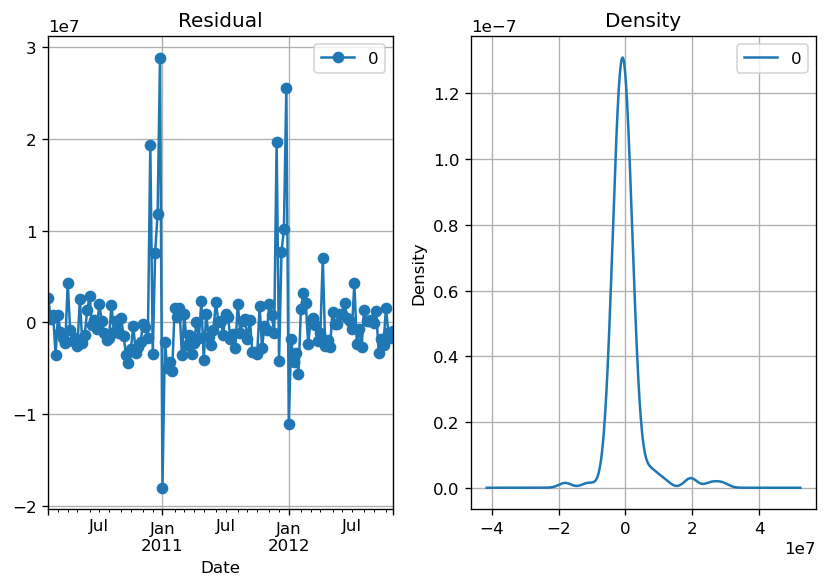

In [41]:
## Residual plot (untuk mengecek error) & Density
residual = pd.DataFrame(model.resid)
plt.figure(figsize=(12,30))

fig, ax = plt.subplots(1,2)
residual.plot(title='Residual',ax=ax[0], marker='o', grid=True)
plt.grid(True)

residual.plot(kind='kde',title='Density',ax=ax[1],grid=True)

plt.tight_layout()
plt.show()

> dari plot residual dan density residualnya pun terlihat jika nilai error residual-nya sudah mendekati nilai 0.

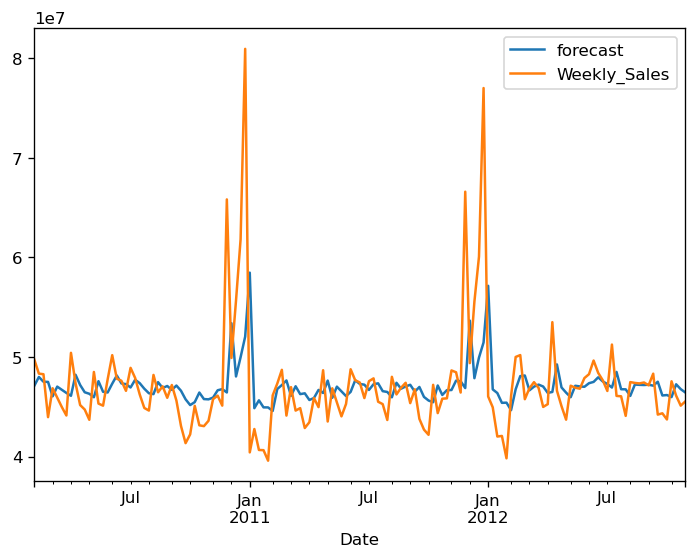

In [42]:
#Hasil forecast berdasarkan seluruh data tanpa split data train dan testing
model.plot_predict()
plt.show()

> dapat kita lihat dari grafik diatas, bahwa hasil prediksi sudah cukup baik. Dimana model sudah membuat trendnya sendiri namun tetap mengikuti tren data aslinya. Jadi tidak Overfitting.

### ARIMA Using Deseason Dataset

#### Decomposition Seasonality (Deaseason)

In [43]:
import statsmodels.api as sm
from pylab import rcParams

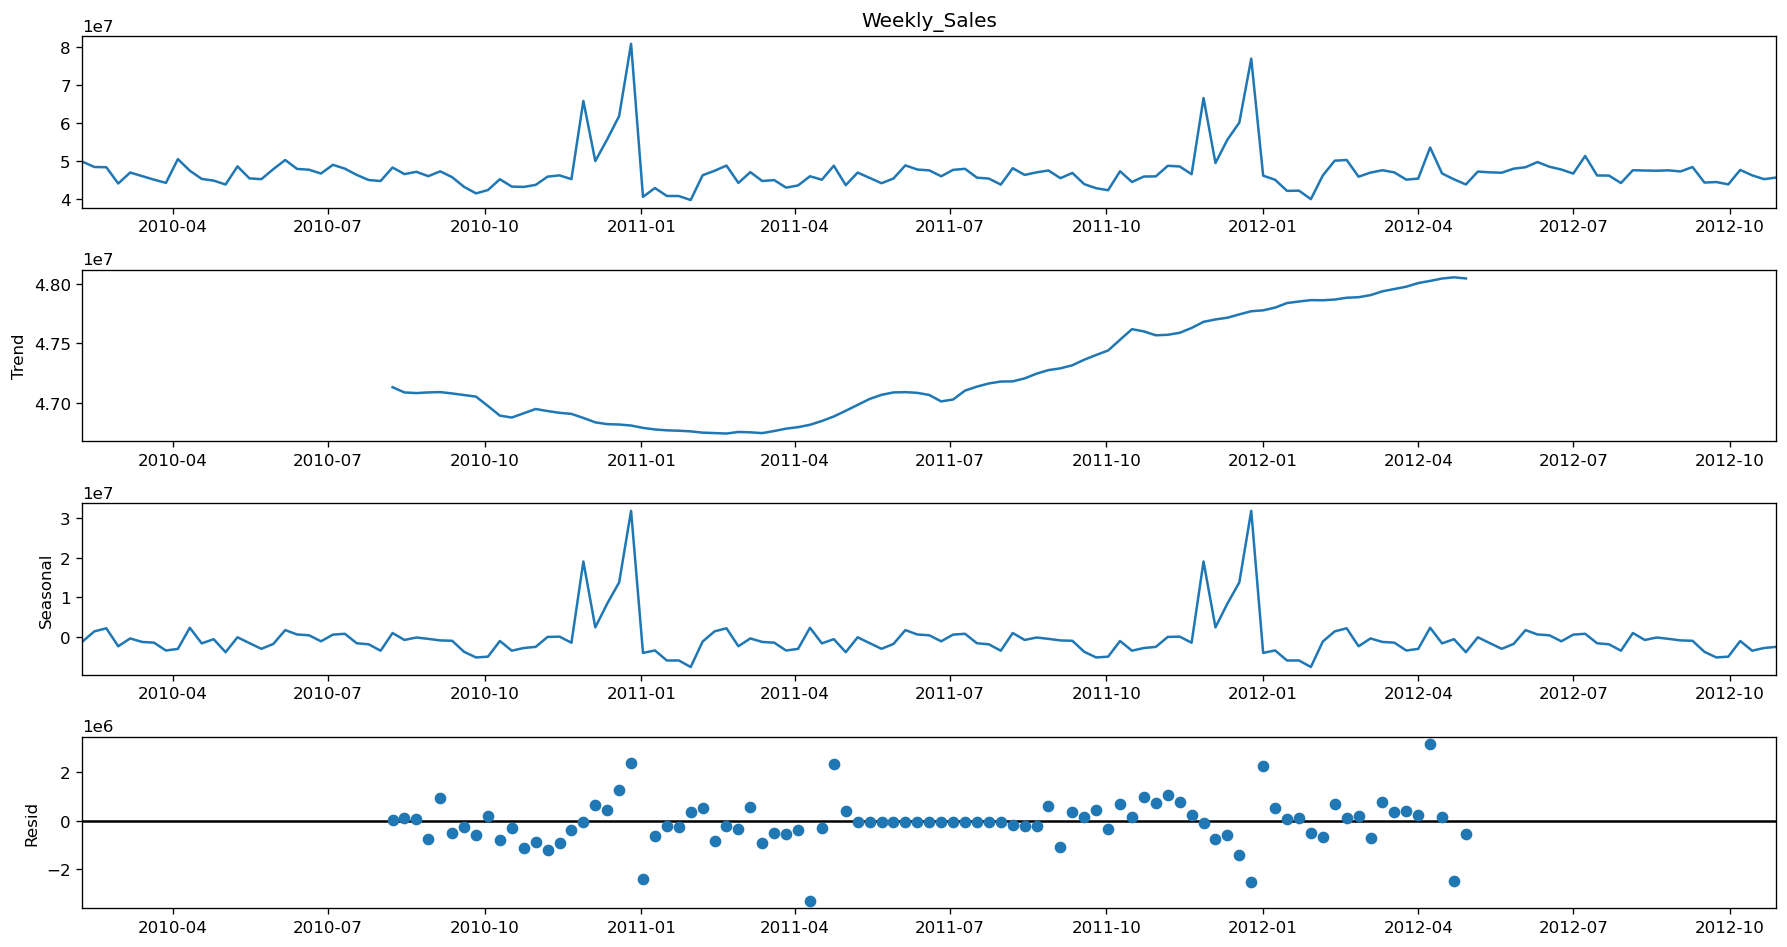

In [44]:
rcParams['figure.figsize'] = (15,8)
decomposition = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomposition.plot()
plt.show()

In [45]:
### Nilai series seasonality
y_deseason = y / decomposition.seasonal

In [46]:
## ad fuller for original deseason
result = adfuller(y_deseason)
print('ADF Statistic: {}'.format(result[0]))
print('P-Value:{}'.format(result[1]))

ADF Statistic: -10.036231800230304
P-Value:1.538081273169091e-17


>jika dilihat dari uji statistik data deaseason diatas, sama seperti data aslinya, P-Value < significance level yang artinya bahwa data sudah bersifat stationery. Jadi tidak perlu dilakukan tahapan differencing

##### AutoCorellation using Deseason Dataset

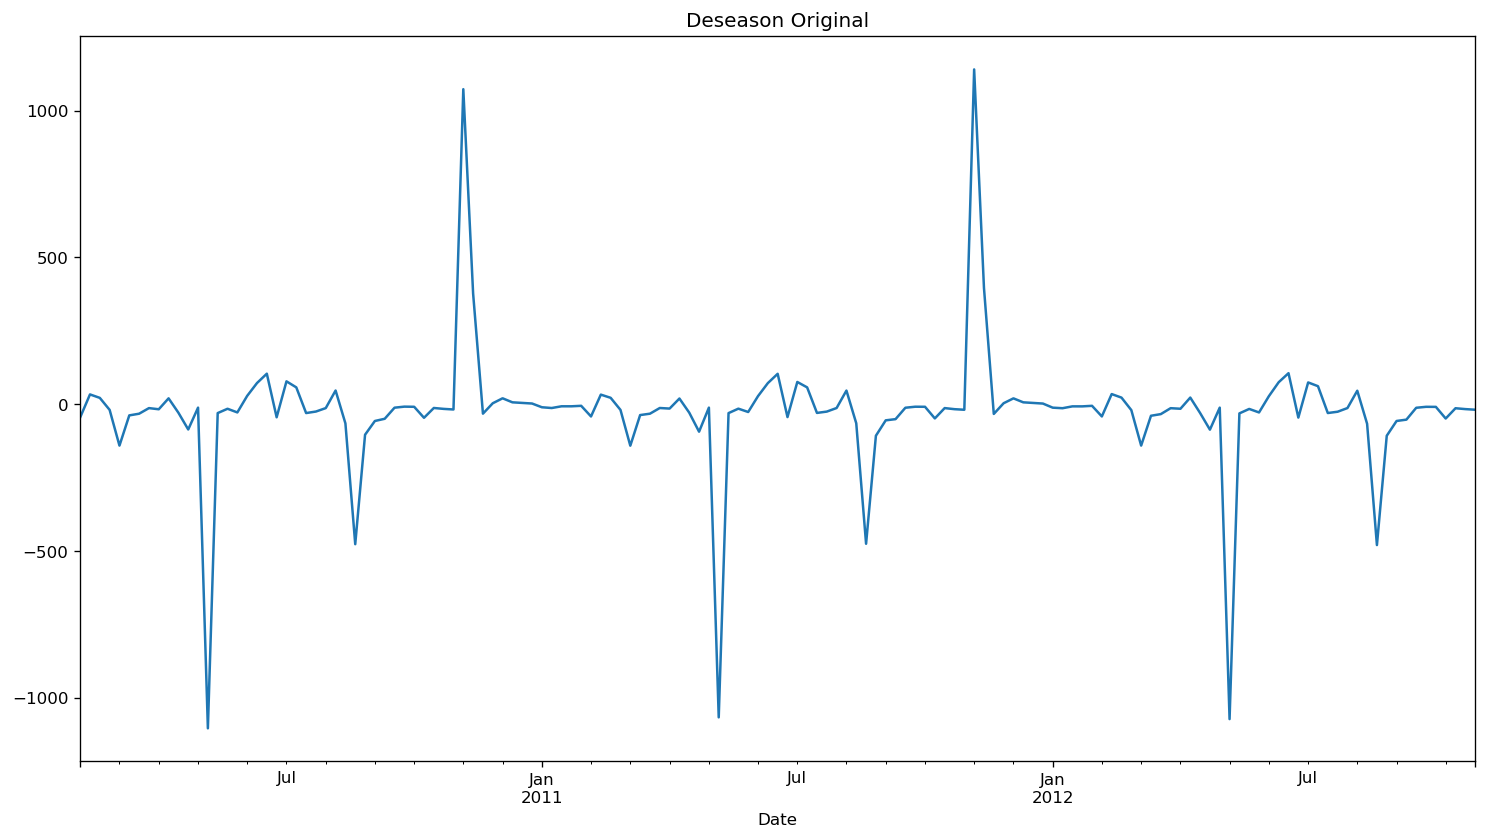

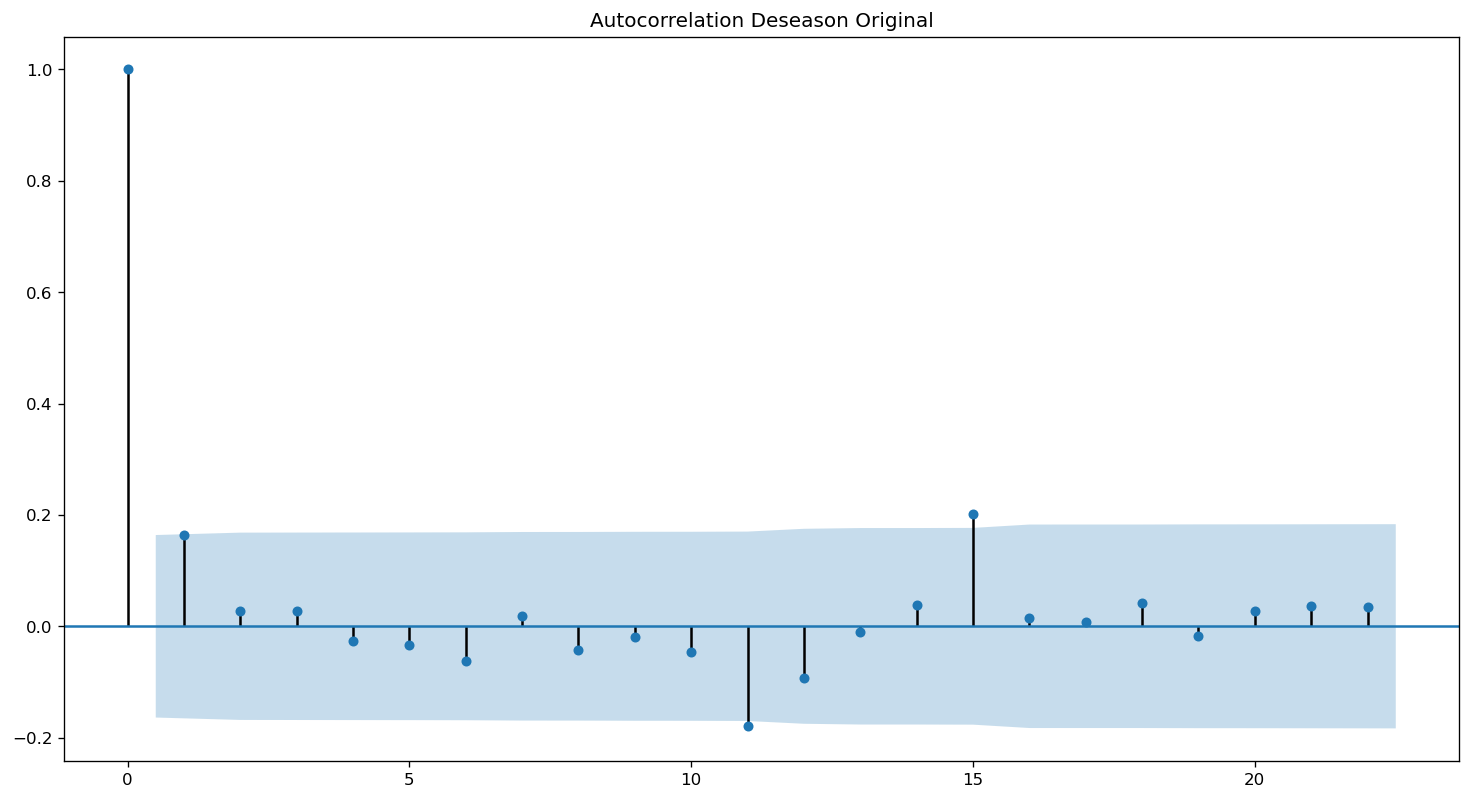

In [47]:
### Deseason Original
ori_deseason = y_deseason.plot()
ori_deseason.set_title('Deseason Original')
plot_acf(y_deseason,title='Autocorrelation Deseason Original')
plt.show()

> Namun jika dilihat pada plot ACF nya, sebaran data yang bernilai positif masih terdapat 13 lag yang menyatakan masih kurang baik dan memiliki pola cut off dilag 1.

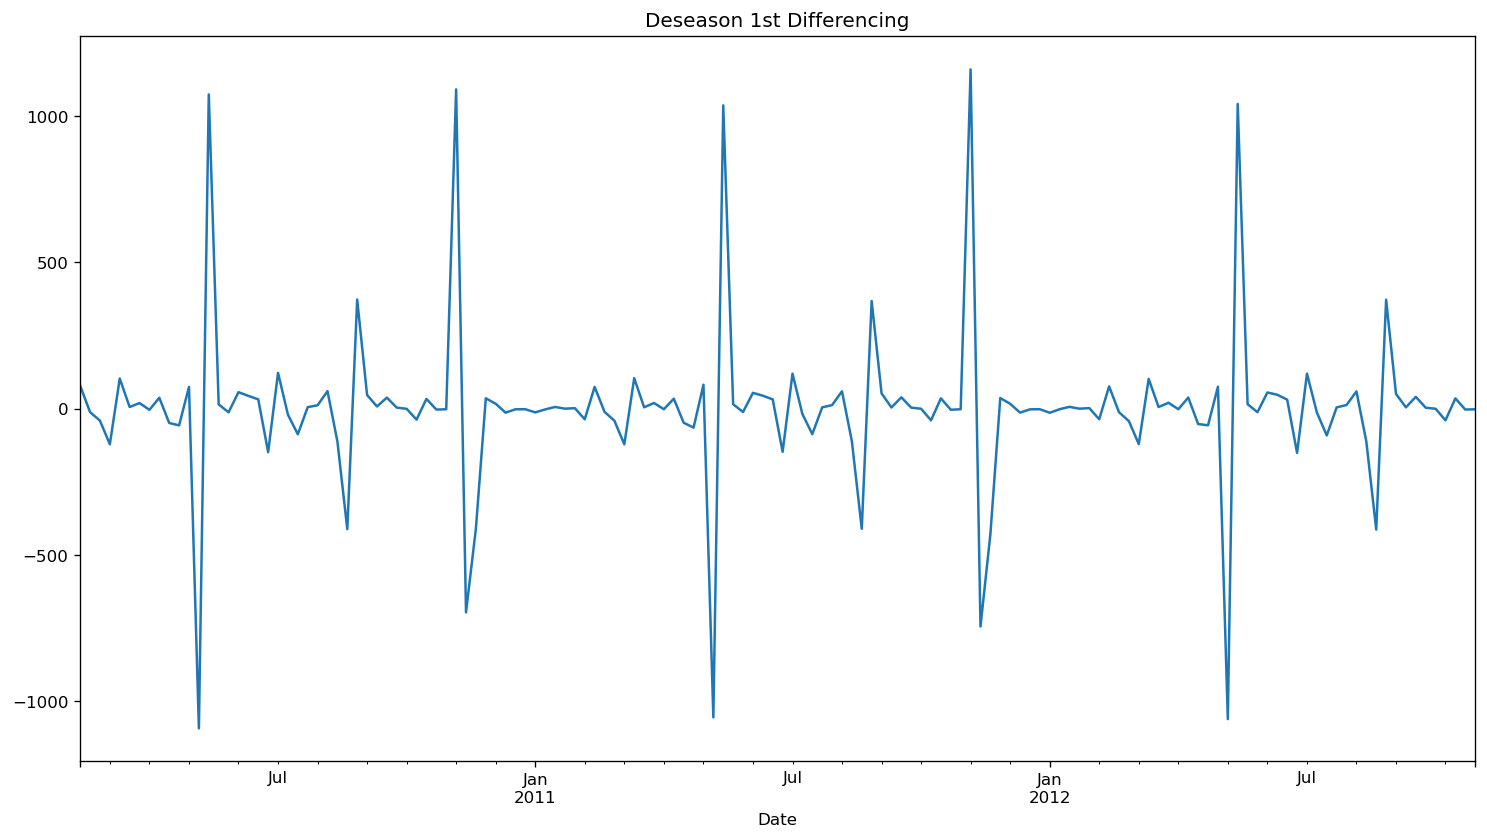

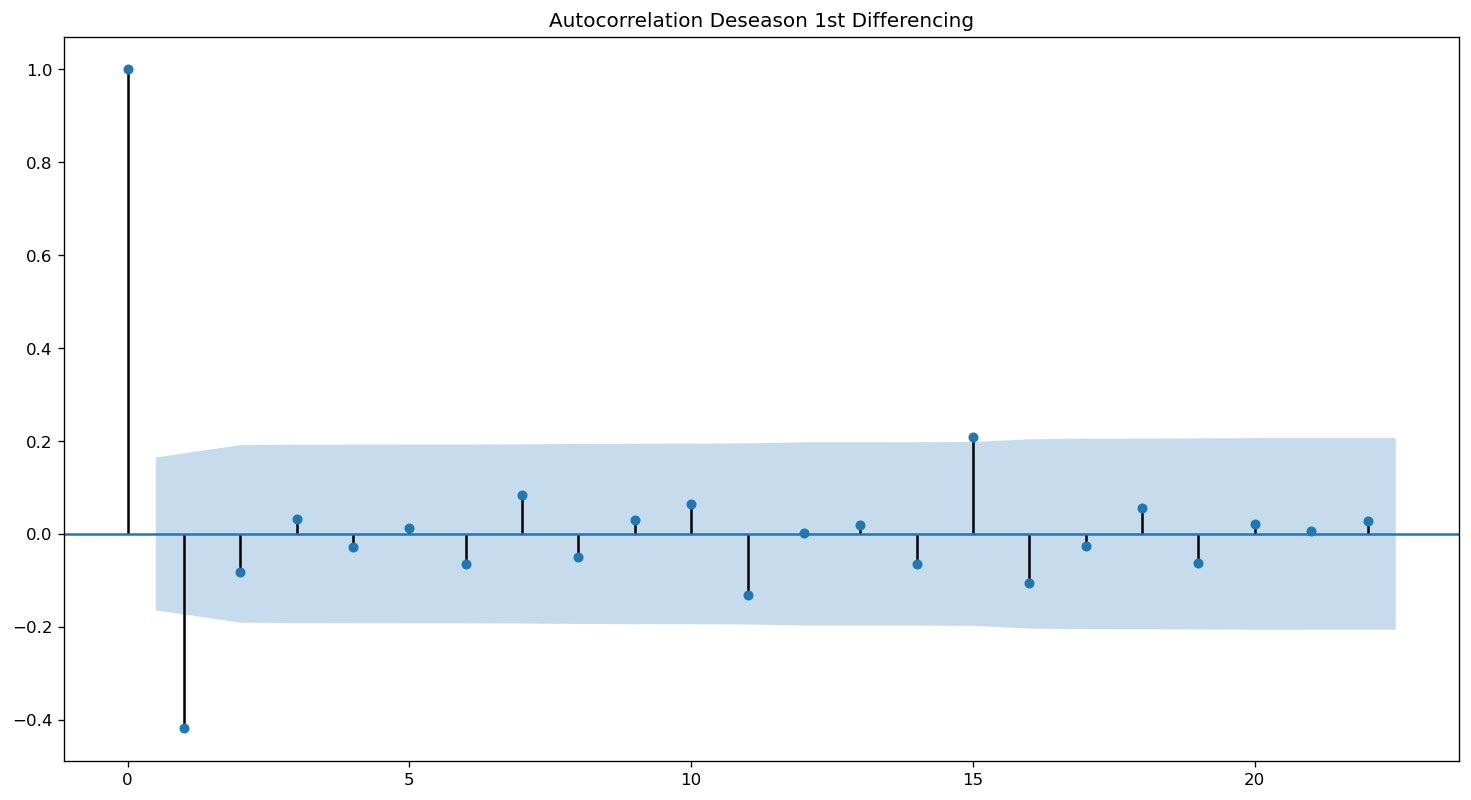

In [48]:
### Deseason with 1st differencing
diff1_deseason = y_deseason.diff().dropna().plot()
diff1_deseason.set_title('Deseason 1st Differencing')
plot_acf(y_deseason.diff().dropna(),title='Autocorrelation Deseason 1st Differencing')
plt.show()

In [49]:
## ad fuller for 1st Differencing deseason 
result = adfuller(y_deseason.diff().dropna())
print('ADF Statistic: {}'.format(result[0]))
print('P-Value:{}'.format(result[1]))

ADF Statistic: -6.636550289656471
P-Value:5.544080310579983e-09


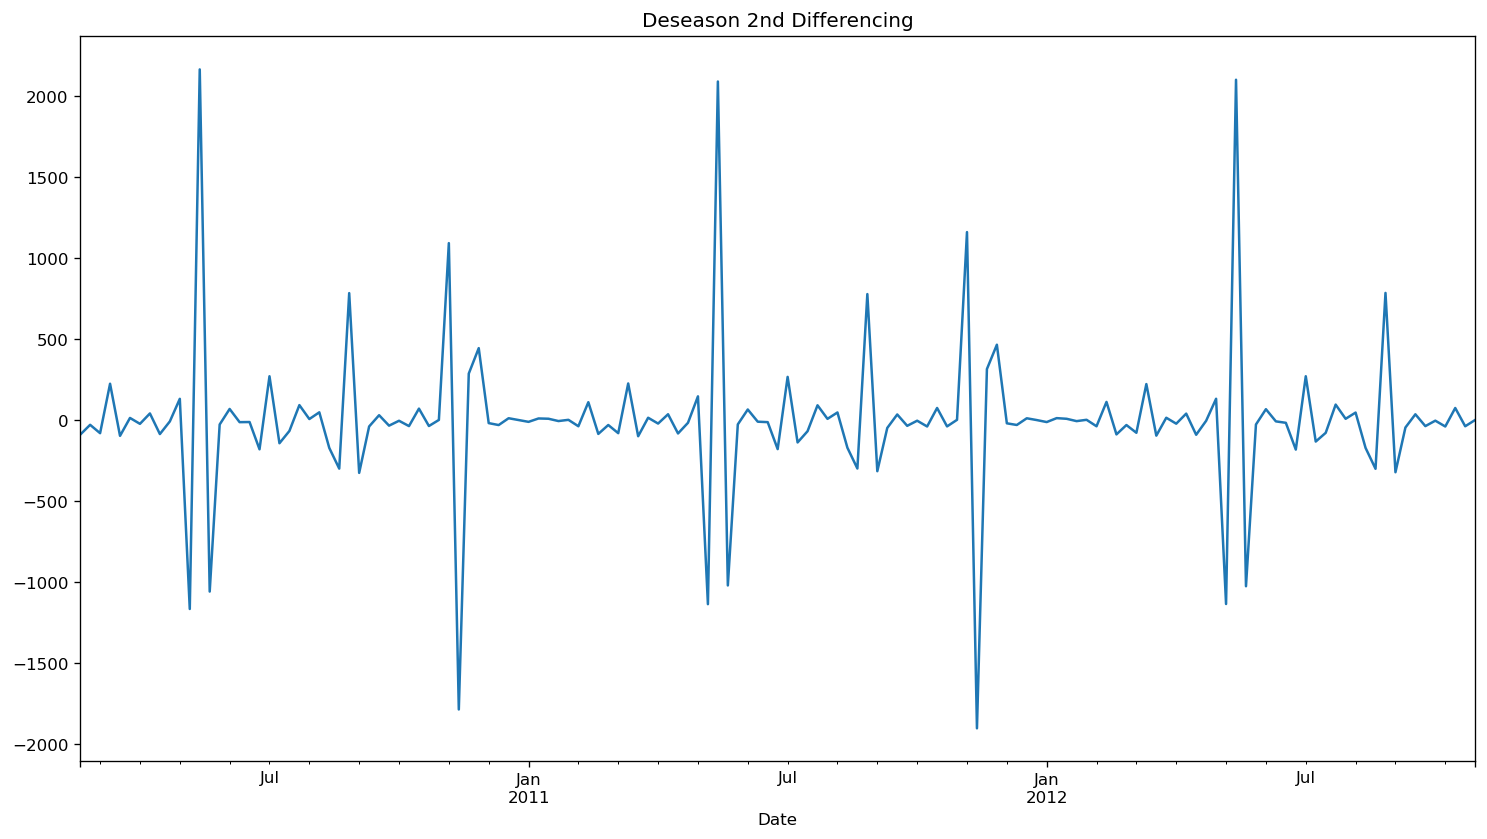

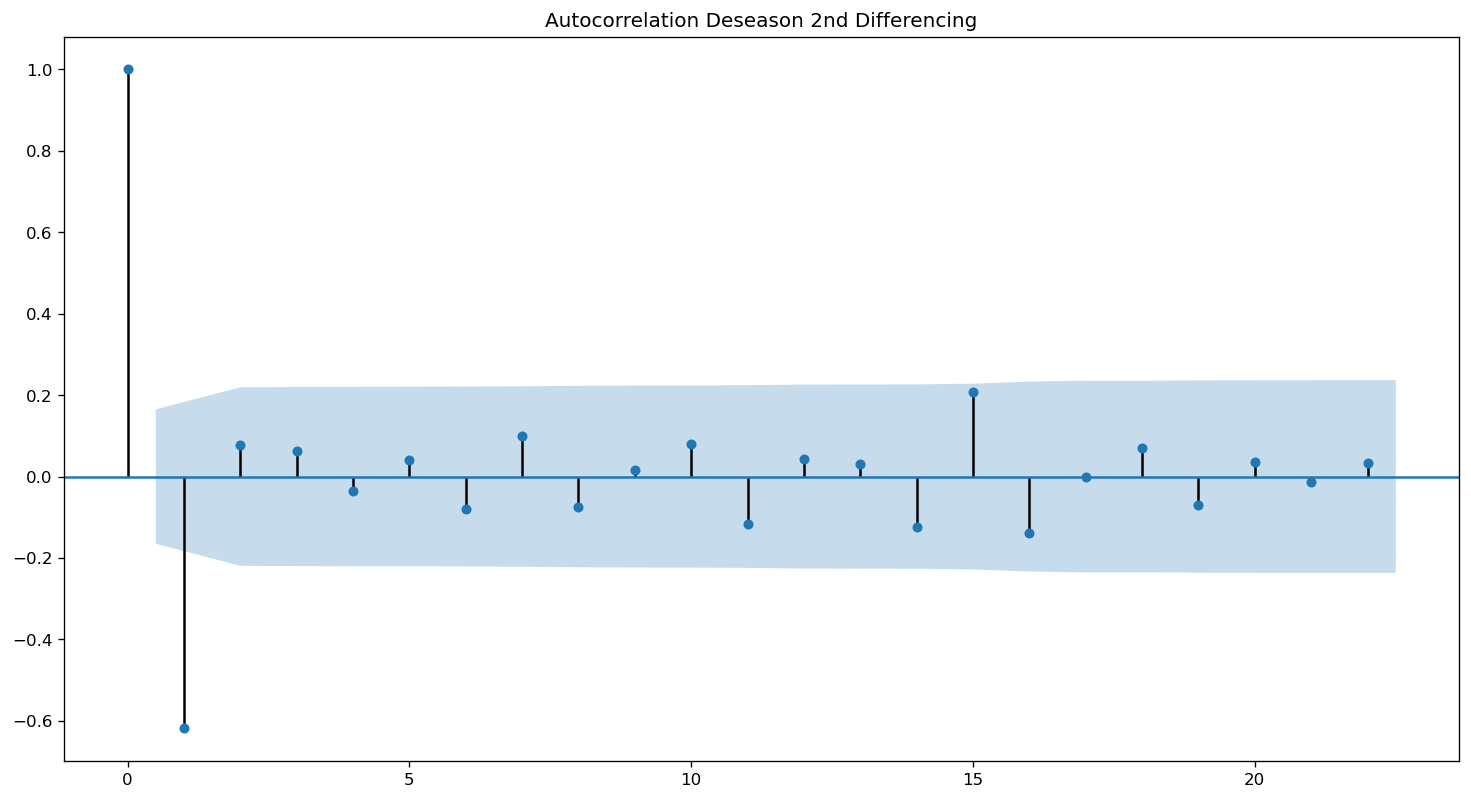

In [50]:
### Deseason with 2nd differencing
diff2_deseason = y_deseason.diff().diff().dropna().plot()
diff2_deseason.set_title('Deseason 2nd Differencing')
plot_acf(y_deseason.diff().diff().dropna(),title='Autocorrelation Deseason 2nd Differencing')
plt.show()

In [51]:
## ad fuller for 2nd Differencing deseason 
result = adfuller(y_deseason.diff().diff().dropna())
print('ADF Statistic: {}'.format(result[0]))
print('P-Value:{}'.format(result[1]))

ADF Statistic: -6.150785623147188
P-Value:7.571460825426101e-08


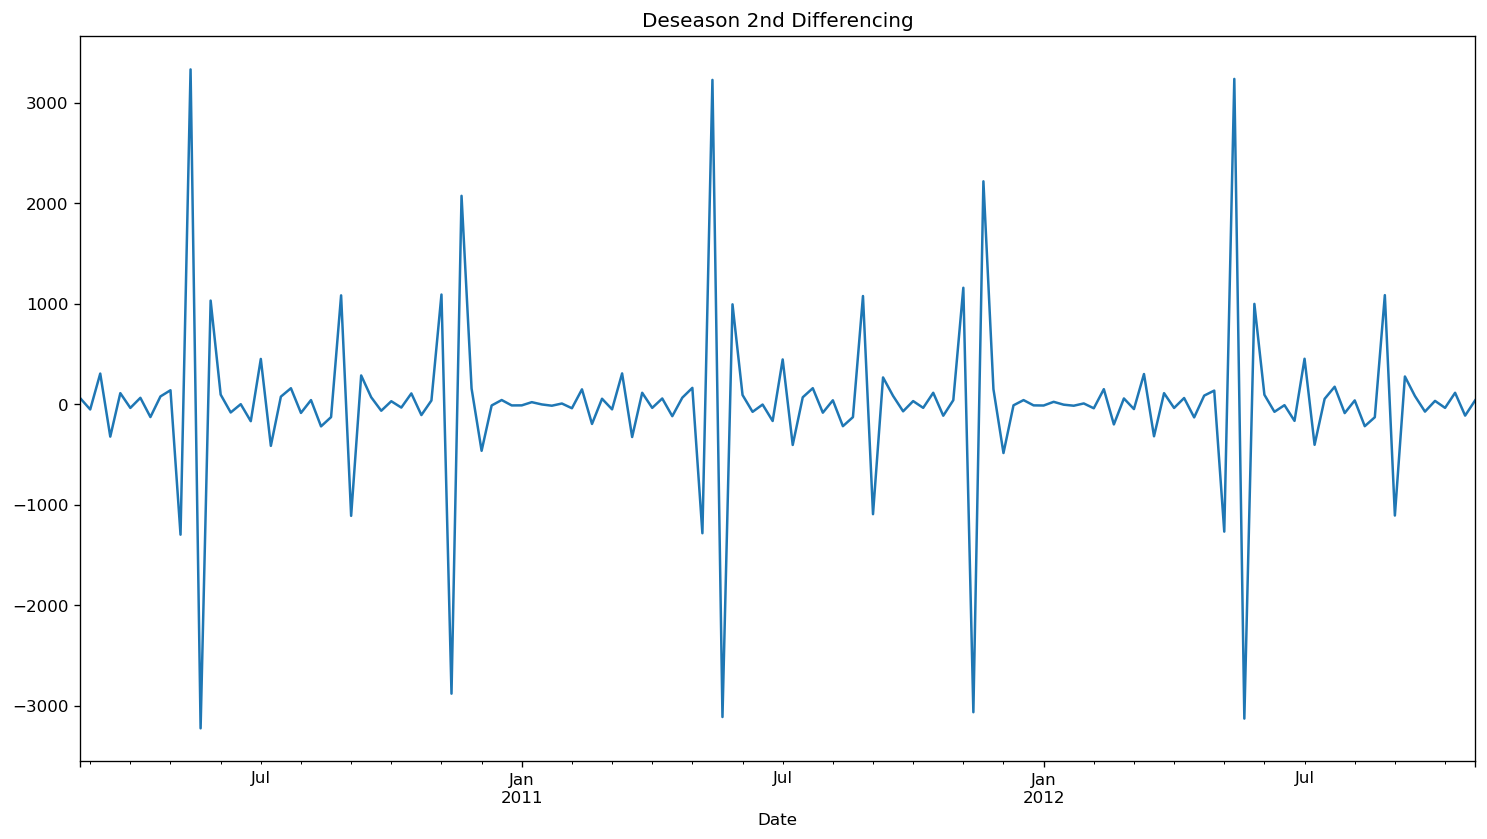

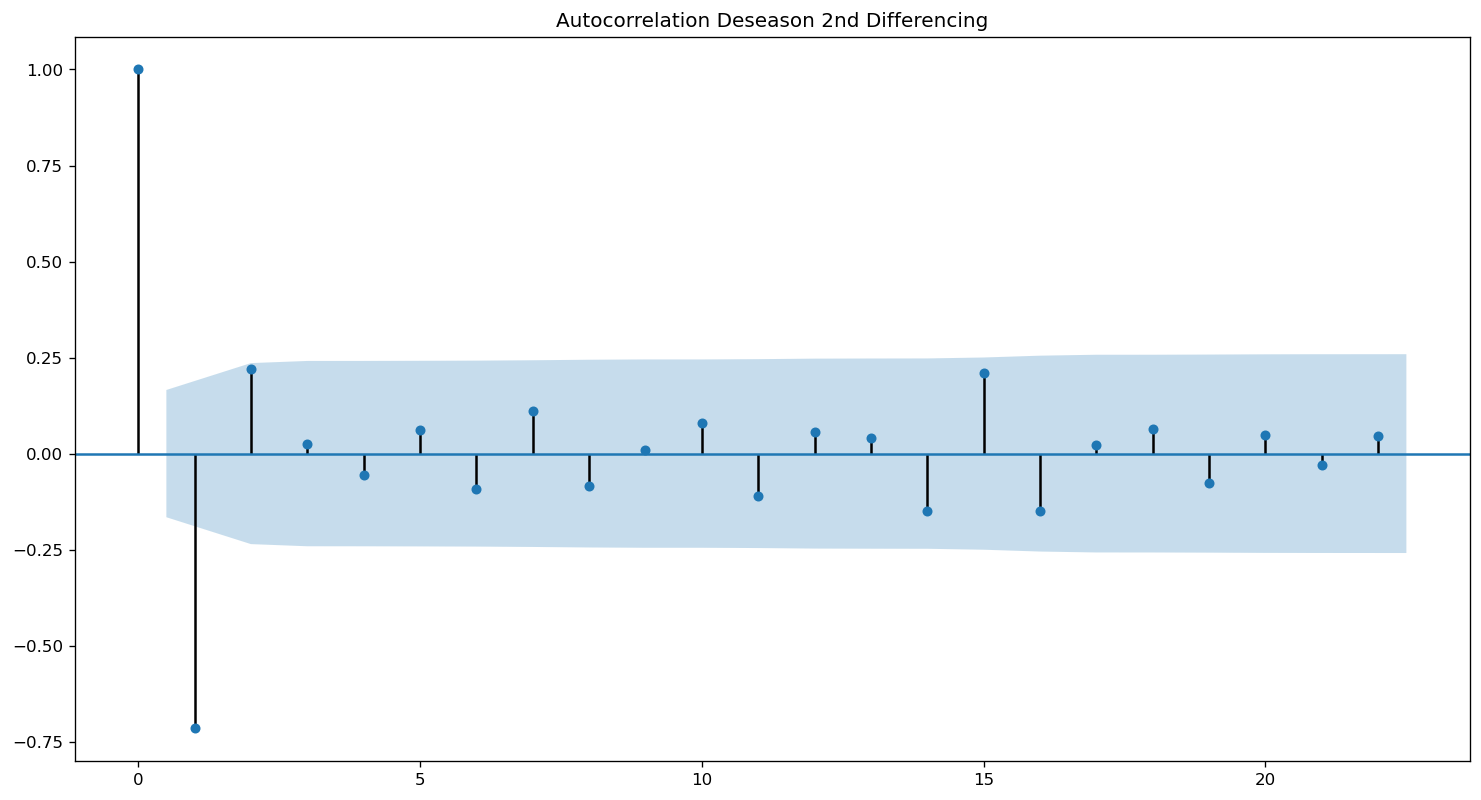

In [52]:
### Deseason with 3rd differencing
diff3_deseason = y_deseason.diff().diff().diff().dropna().plot()
diff3_deseason.set_title('Deseason 2nd Differencing')
plot_acf(y_deseason.diff().diff().diff().dropna(),title='Autocorrelation Deseason 2nd Differencing')
plt.show()

In [53]:
## ad fuller for 3rd Differencing deseason 
result = adfuller(y_deseason.diff().diff().diff().dropna())
print('ADF Statistic: {}'.format(result[0]))
print('P-Value:{}'.format(result[1]))

ADF Statistic: -6.38323920268514
P-Value:2.195905679708177e-08


> Jika dilihat pada plot ACF yang sudah dilakukan differending sampai 3x, sebaran data yang bernilai positif menurun dan bertahan menjadi hanya 12 lag yang menyatakan masih kurang baik. Walaupun hasil penujiannya sudah dibawah nilai significance levelnya. Peneliti akan mengambil nilai data deseason dengan differencing 1.

##### Partial AutoCorellation using Deseason Dataset

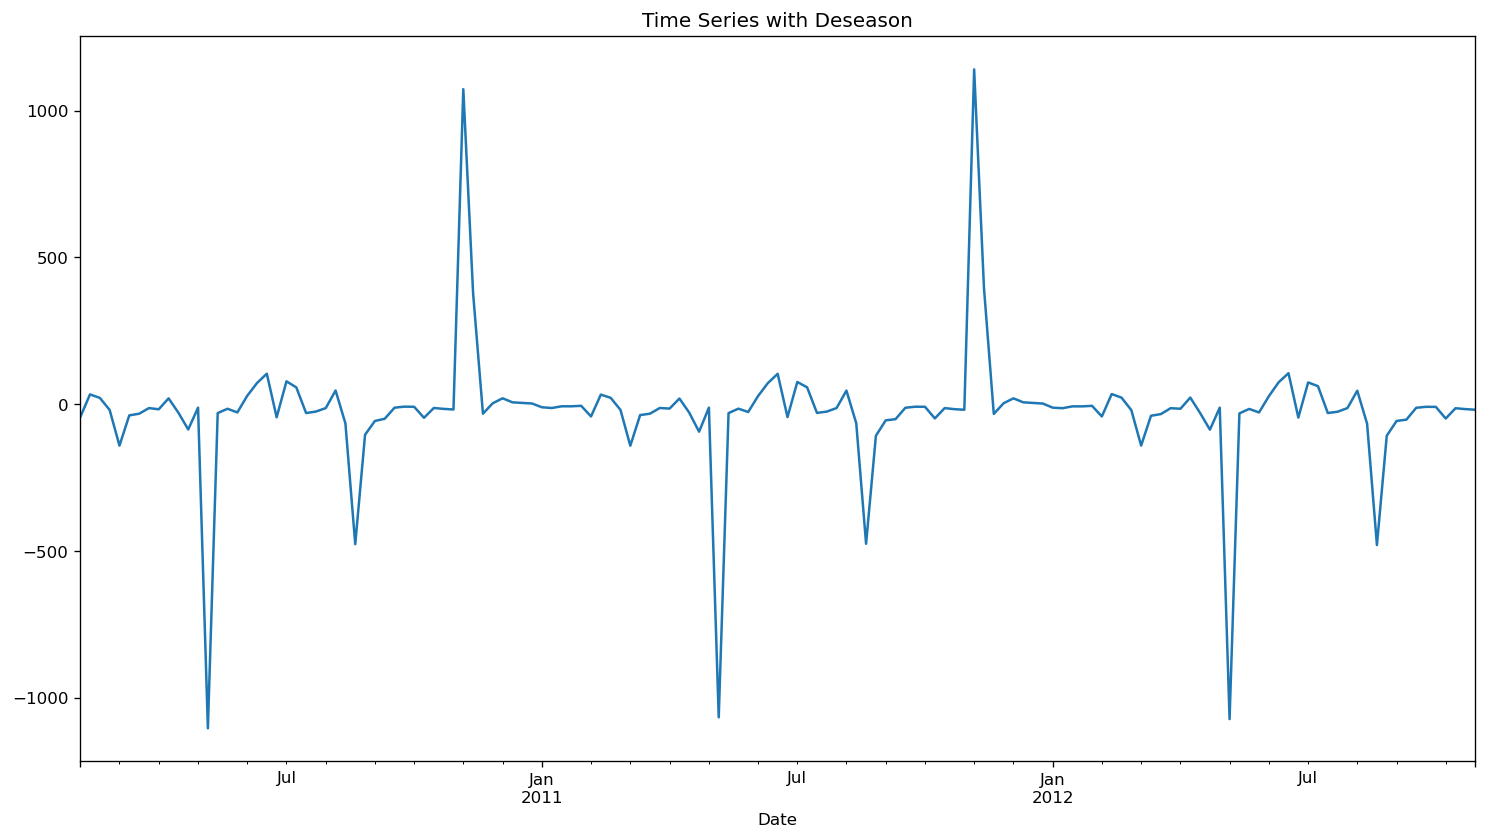

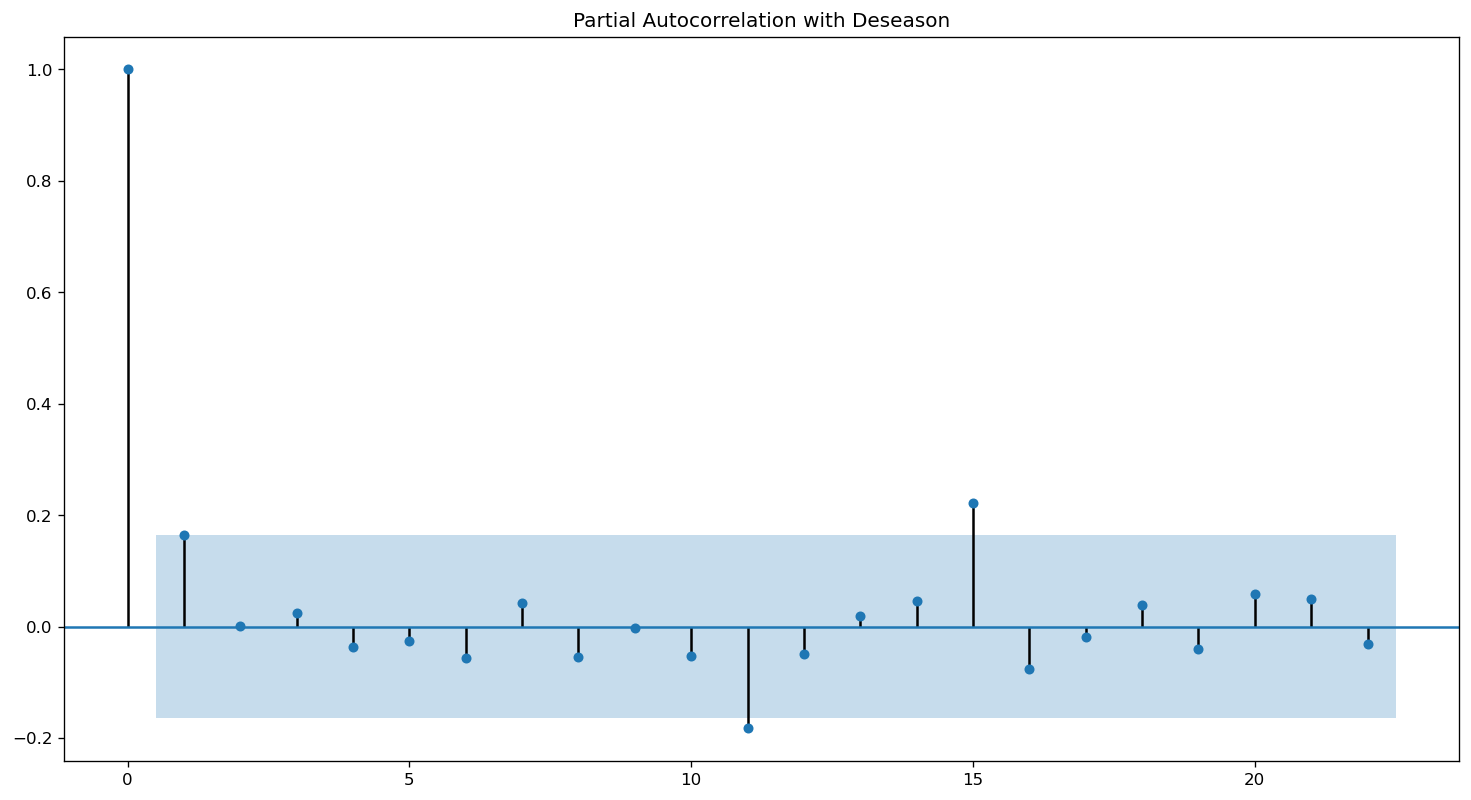

In [54]:
#PACF Plot
y_pacf = y_deseason.plot()
y_pacf.set_title('Time Series with Deseason')
plot_pacf(y_deseason,title='Partial Autocorrelation with Deseason')
plt.show()

> Jika dilihat pada plot PACF, sebaran data yang bernilai positif masih terdapat 11 lag yang menyatakan masih kurang baik dan memiliki pola cut off.

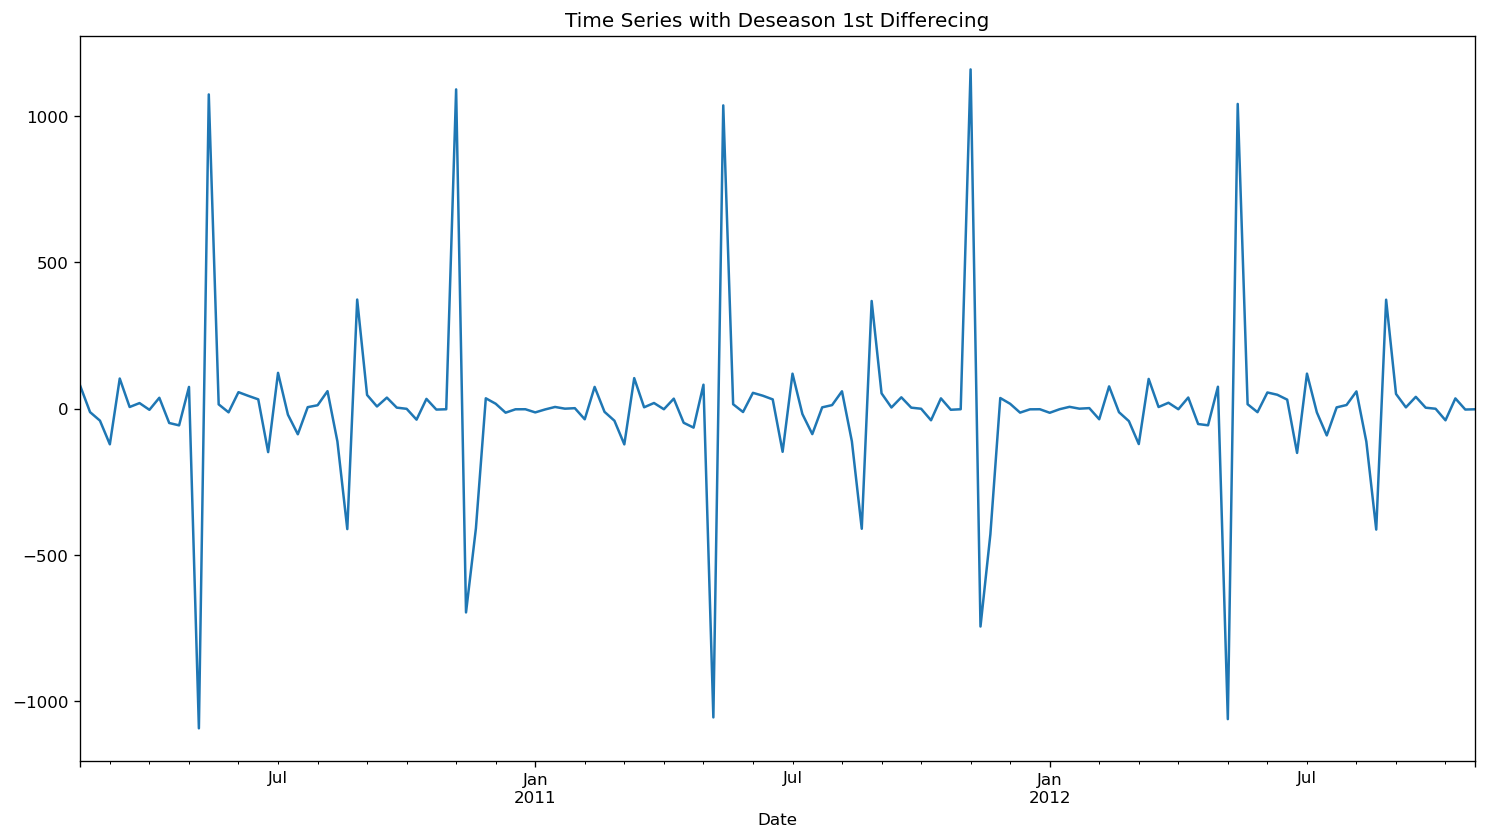

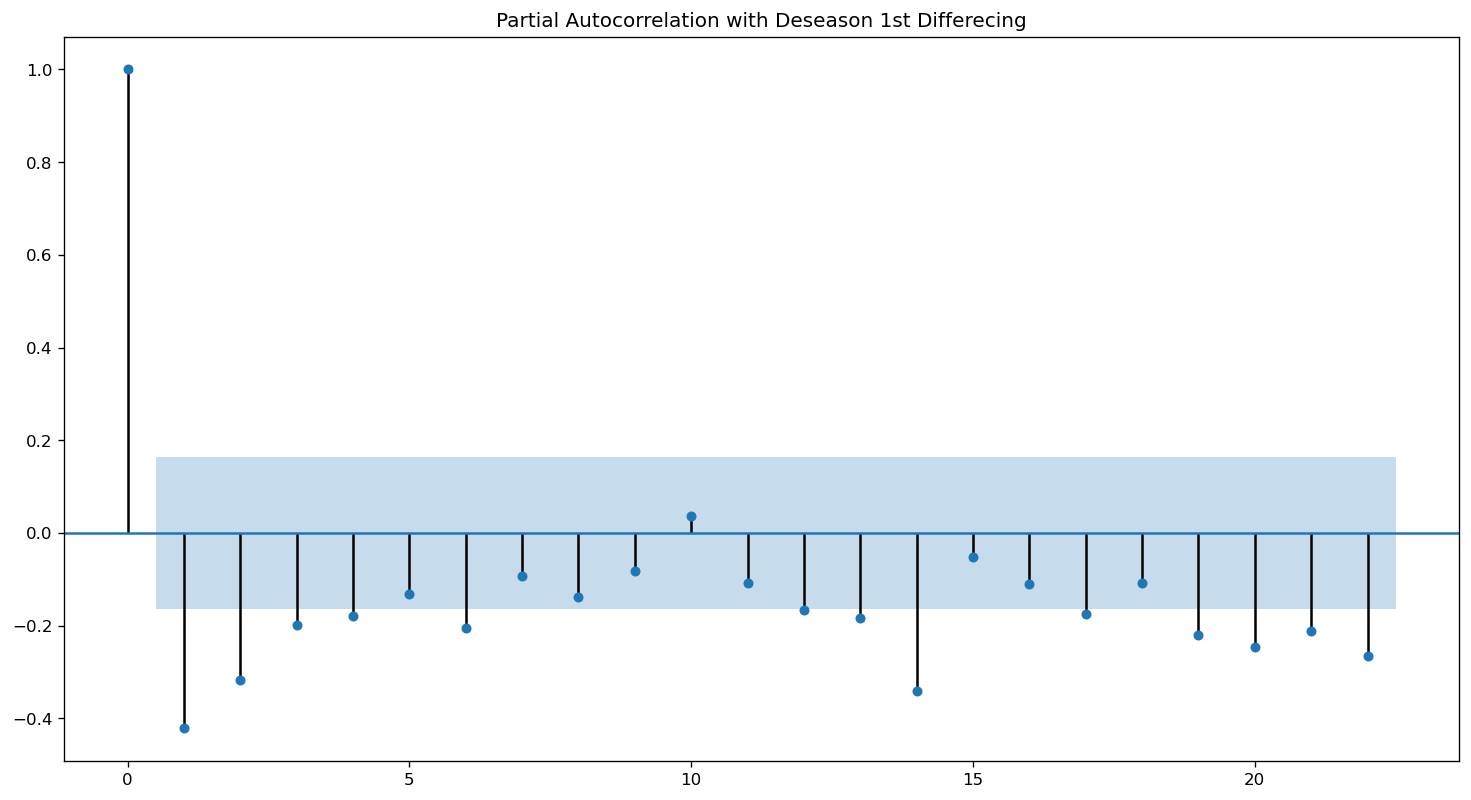

In [55]:
#PACF Plot using 1st Differencing
y_pacf = y_deseason.diff().dropna().plot()
y_pacf.set_title('Time Series with Deseason 1st Differecing')
plot_pacf(y_deseason.diff().dropna(),title='Partial Autocorrelation with Deseason 1st Differecing')
plt.show()

> Namun kebalikannya, nilai PACF terliat lebih baik di nilai data dengan deseason tanpa differencing. Dengan demikian, peniliti memilih data deseason tanpa differencing untuk dimasukan kedalam model.

##### ARIMA using Deseasonal Dataset

In [111]:
model2 = ARIMA(y_deseason,order=(1,0,0))
model2 = model2.fit()

> walaupun ACF dan PACF nya berpola cut off, dengan asumsi peneliti model yang cocok untuk ARIMA nya adalah p=0,d=0, dan q=0. Namun agar perbandingan apple to apple dengan komposisi ARIMA yang digunakan pada model pertama maka digunakan p=1,d=0, dan q=0.

In [112]:
print(model2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood                -974.538
Method:                       css-mle   S.D. of innovations            220.504
Date:                Thu, 19 Nov 2020   AIC                           1955.075
Time:                        11:12:34   BIC                           1963.964
Sample:                    02-07-2010   HQIC                          1958.687
                         - 10-28-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0158     21.976     -1.093      0.274     -67.088      19.056
ar.L1.y        0.1621      0.082      1.971      0.049       0.001       0.323
                                    Roots           

> dari hasil summary diatas nilai AR dan MA term of P>|z| ~ 0 yang dimana menunjukan bahwa hasilnya cukup baik dan kostantannya sudah signifikan. Walaupun nilai terkecil  P>|z|-nya berada pada p dengan nilai 0.

- nilai AR dan MA harus sudah mendekati 0, namun lebih besar jika dibandingkan dengan menggunakan data aslinya.
- nilai AIC dan BIC sudah semakin kecil, jika dibandingkan summary menggunakan data aslinya.
- note: AIC adalah penduga kesalahan prediksi out-of-sampel dan dengan demikian kualitas relatif model statistik untuk sekumpulan data tertentu. semakin kecil nilainya semakin baik.

In [58]:
model2.resid

Date
2010-02-07    -20.750476
2010-02-14     60.921443
2010-02-21     36.445171
2010-02-28     -2.536824
2010-03-07   -117.574549
                 ...    
2012-09-30     12.628425
2012-10-07    -27.038985
2012-10-14     14.474321
2012-10-21      5.836997
2012-10-28      4.230382
Freq: W-SUN, Length: 143, dtype: float64

> jika dibandingkan dengan residu pada data originalnya, memang dapat dilihat nilainya sudah terlihat lebih rendah

<Figure size 1440x720 with 0 Axes>

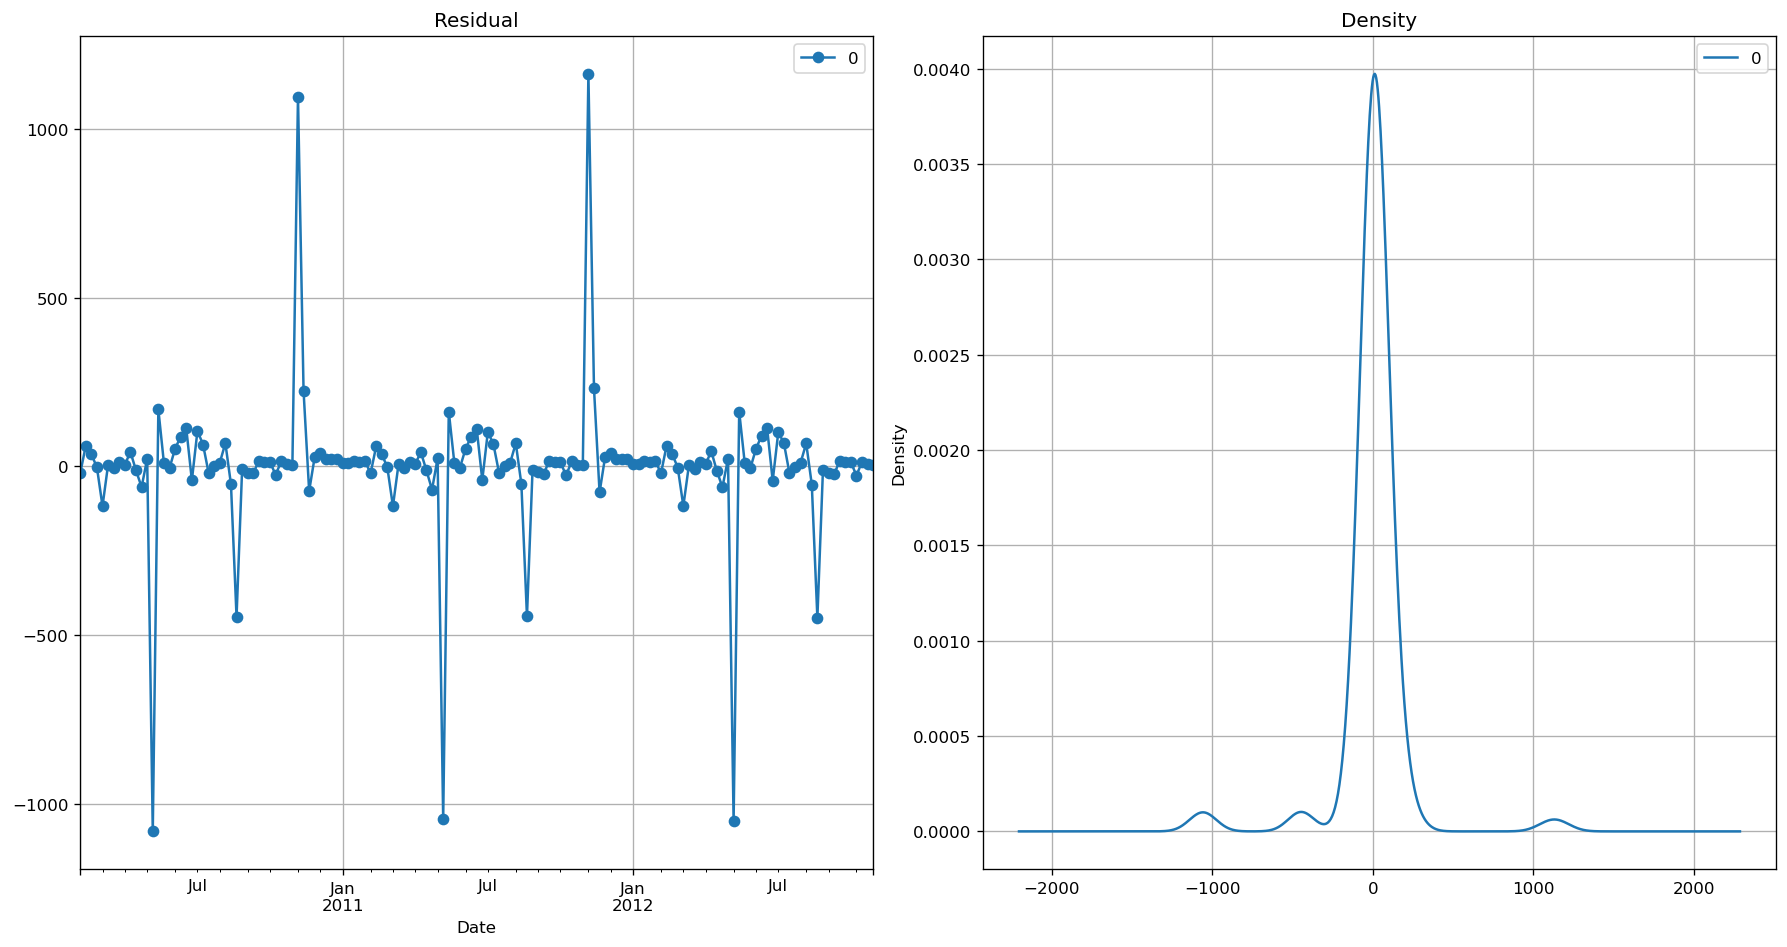

In [59]:
## Residual plot (untuk mengecek error) & Density
residual = pd.DataFrame(model2.resid)
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,2)
residual.plot(title='Residual',ax=ax[0], marker='o', grid=True)
residual.plot(kind='kde',title='Density',ax=ax[1], grid=True)
plt.tight_layout()
plt.show()

> namun jika dilihat kembali pada plot residunya, tidak ada perubahan yang cukup signifikan jika dibandingkan dengan plot residu data originalnya dan cenderung serupa.

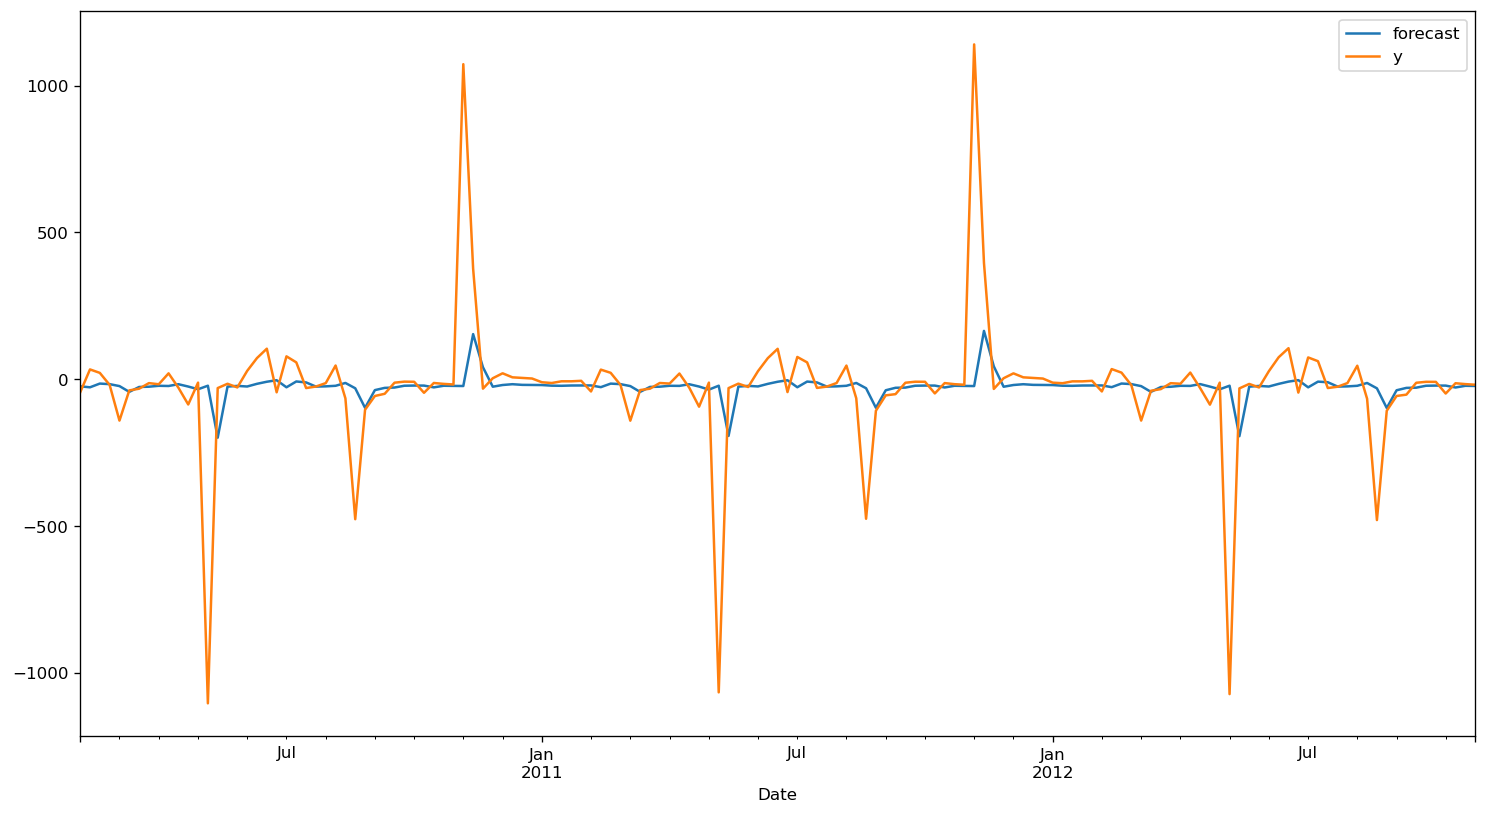

In [60]:
#Hasil forecast berdasarkan seluruh data deseason tanpa split data train dan testing
model2.plot_predict()
plt.show()

> Plot prediksi yang dihasilkan pun cenderung mendekati nilai 0.

#### Mencari Parameter terbaik untuk ARIMA (original data)

In [61]:
# find best parameter for our model
import pmdarima as pm

In [62]:
## original dataset
model = pm.auto_arima(y,start_p=1, start_q=1,
                     test='adf', #use adf test for finding the optimal value (differencing) -> 'Stationary'
                     max_p=3, max_q=3, #maximum term od p & q
                     m=7, #frequency of series(weekly)
                     seasonal= False,
                     trace = True, #debugging Information
                     stepwise = True, #optimal combination
                     suppress_warnings=True, #warnings when stats models running
                     start_P = 0, #auto regresi seasonal model
                     start_D = 0, #order the seasonal differencing
                     )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4853.809, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5370.491, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5343.635, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4855.994, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4830.601, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4834.617, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4829.490, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4829.420, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4831.228, T

> jika kita kembali melihat model arima yang kita gunakan pada data original, best model yang di dapat adalah di p=2, d=0, dan q =0 intercept dengan nilai AIC=2536.269. Sedangkan pada model yang diimplementasikan adalah p=1, d=0, q=0 intercept, yang dimana pada hasil pengujian diatas mendapat nilai AIC di 2536.279. Hanya terdapat selisih 0.01 antara model yang digunakan dan best model yang ditemukan.

<function matplotlib.pyplot.show(*args, **kw)>

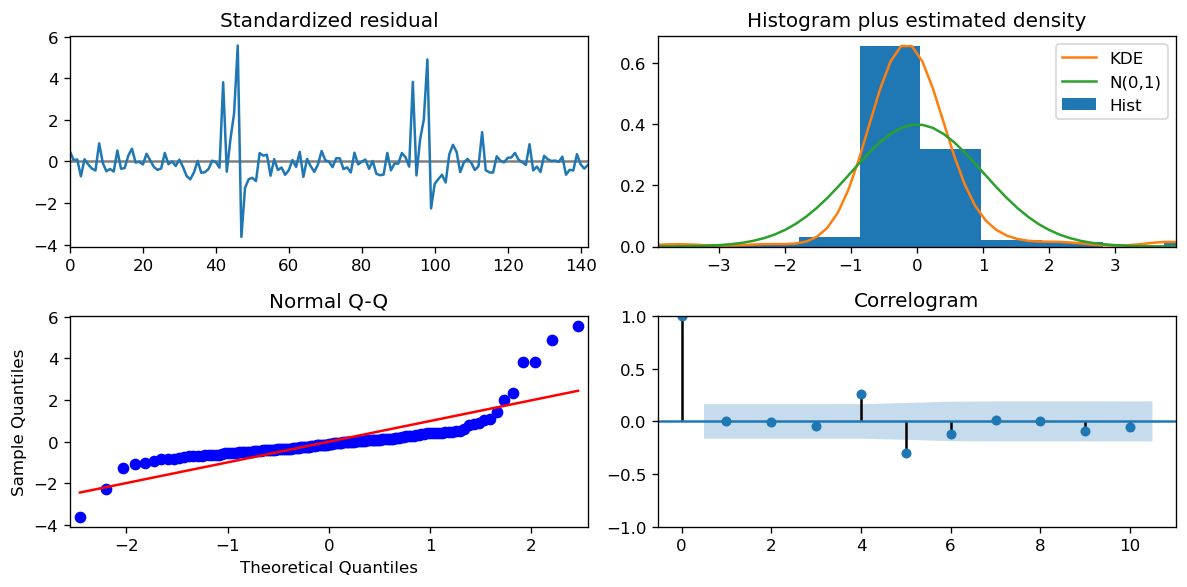

In [63]:
### check the residual plot for our stepwise modeling
model.plot_diagnostics(figsize=(10,5))
plt.tight_layout()
plt.show

#### Mencari Parameter terbaik untuk ARIMA (deseason data)

In [64]:
## Deseason dataset
model = pm.auto_arima(y_deseason,start_p=1, start_q=1,
                     test='adf', #use adf test for finding the optimal value (differencing) -> 'Stationary'
                     max_p=3, max_q=3, #maximum term od p & q
                     m=7, #frequency of series(weekly)
                     seasonal= False,
                     trace = True, #debugging Information
                     stepwise = True, #optimal combination
                     suppress_warnings=True, #warnings when stats models running
                     start_P = 0, #auto regresi seasonal model
                     start_D = 0, #order the seasonal differencing
                     )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1956.234, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1956.546, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1954.251, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1954.394, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1956.240, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1958.221, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1955.075, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.650 seconds


> Sedangkan untuk pemodelan ARIMA menggunakan data deseason, komposisi terbaiknya ada di p=0, d=0, q=0 dimana sudah sesuai dengan asumsi peneliti walaupun saat pengetesan menggunakan p=1. Walaupun nilai AIC nya tidak terlampau jauh.

<function matplotlib.pyplot.show(*args, **kw)>

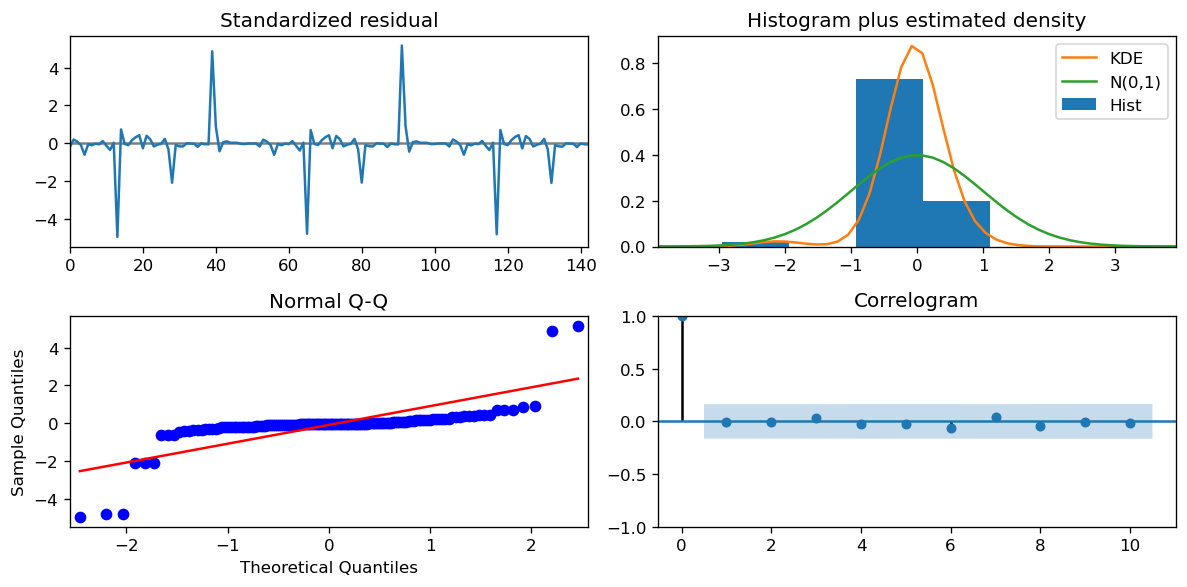

In [65]:
### check the residual plot for our stepwise modeling
model.plot_diagnostics(figsize=(10,5))
plt.tight_layout()
plt.show

### Pengujian model menggunakan metode out of time cross validation (original data)

In [66]:
143-len(y)*0.25

107.25

In [67]:
## Data Split
test = y[107:] ## 25% data test
train = y[:107] ## 100% data train

In [68]:
len(test)

36

In [69]:
model_final = ARIMA(train,order=(2,0,0)) #menggunakan best model
fitted = model_final.fit(disp=-1)

# Langkah untuk Forecast (fc=forecast,se=standard error,conf=confident intervals)
fc, se, conf = fitted.forecast(36)

In [113]:
#melihat data hasil forecast dibandingkan dengan data testnya
round_fc = { 'hasil_fc': fc, 'aktual/test': test, 'selisih': fc-test, '%':(fc-test)/test*100}
round_fc = pd.DataFrame(round_fc)

In [71]:
round_fc
# plt.plot(fc_series, marker='o')

,hasil_fc,aktual/test,selisih,%
Date,,,,
2012-02-26,4.846441e+07,45771506.57,2.692899e+06,5.883353
2012-03-04,4.796918e+07,46861034.97,1.108150e+06,2.364757
2012-03-11,4.760093e+07,47480454.11,1.204773e+05,0.253741
2012-03-18,4.742776e+07,46901504.94,5.262595e+05,1.122052
2012-03-25,4.732915e+07,44993794.45,2.335358e+06,5.190400
2012-04-01,4.727763e+07,45272862.02,2.004772e+06,4.428198
2012-04-08,4.724969e+07,53502315.87,-6.252630e+06,-11.686654
2012-04-15,4.723477e+07,46629261.41,6.055131e+05,1.298569
2012-04-22,4.722676e+07,45072529.78,2.154231e+06,4.779476


In [72]:
# fc_series

In [73]:
# test

In [74]:
# plt.plot(test)

In [75]:
# Make series
fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:,0],index = test.index)
upper_series = pd.Series(conf[:,1],index = test.index)

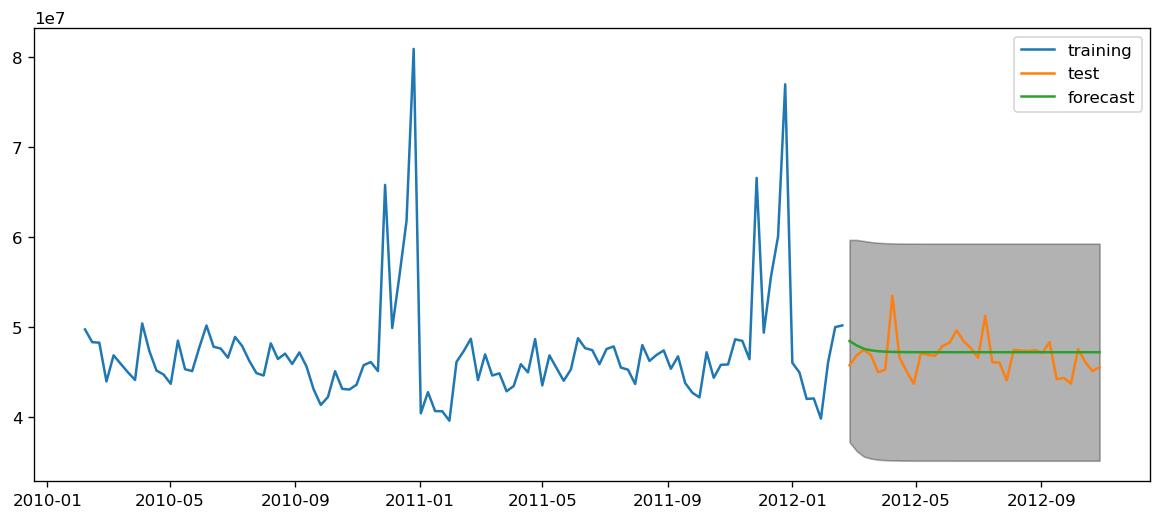

In [76]:
#plot
plt.figure(figsize=(12,5))
#data training
plt.plot(train,label='training')
#data actual
plt.plot(test,label='test')
#data forecast
plt.plot(fc_series,label='forecast')

plt.fill_between(lower_series.index,lower_series,upper_series,color='black', alpha=0.3)
plt.legend()

> Jika dilihat dari ploting diatas dapat dikatakan jika model yang dihasilkan bersifat underfitting, karena menghasilkan prediksi yang kurang baik

### Evaluation with 3 Metrics
- MAPE (Mean Absolute Percentage Error)
- Correlation (correlation between the actual and the forecast)
- Min Max (refers to min-max error)

In [77]:
def forecast_metrics(forecast,actual):
    
    ## MAPE evaluation
    mape = np.mean(np.abs(fc-test)/np.abs(test))

    ## correlation evaluation use pearson
    corr = np.corrcoef(fc,test)[0][1]

    ## MinMax evaluation
    mins = np.amin(np.hstack([fc[:,None],test[:,None]]),axis=1)
    maxs = np.amax(np.hstack([fc[:,None],test[:,None]]),axis=1)
    minmax = 1-np.mean(mins/maxs)
    
    return ({'MAPE': mape, 'Correlation': corr, 'MinMax': minmax})

In [78]:
forecast_metrics(fc,test)

{'MAPE': 0.03238679345769841,
 'Correlation': -0.0628146107235571,
 'MinMax': 0.03125289556011501}

### Dari perhitungan matriks diatas, jika kita melakukan testing menggunakan sampling test 25% dari data original maka didapatkan hasil:
- MAPE sebesar 3%, atau bisa diasumsikan akurasi model dalam melakukan forecating sebesar 97%.Namun belum dapat teraktualisasi berdasarkan plot forecasting sebelumnya.
- Nilai kolerasi -6% dimana mengasumsikan adanya korelasi yang cukup baik antara data forecasting dengan data test
- Nilai MinMax (represent error value) juga terbilang kecil, yaitu sebesar 3%.

### Pengujian model menggunakan metode out of time cross validation (deseason data)

In [103]:
## Data Split
test = y_deseason[107:] ## 25% data test
train = y_deseason[:107] ## 100% data train

In [104]:
model_final = ARIMA(train,order=(0,0,0)) #menggunakan best model
fitted = model_final.fit()

# Langkah untuk Forecast (fc=forecast,se=standard error,conf=confident intervals)
fc, se, conf = fitted.forecast(36)

In [105]:
# Make series
fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:,0],index = test.index)
upper_series = pd.Series(conf[:,1],index = test.index)

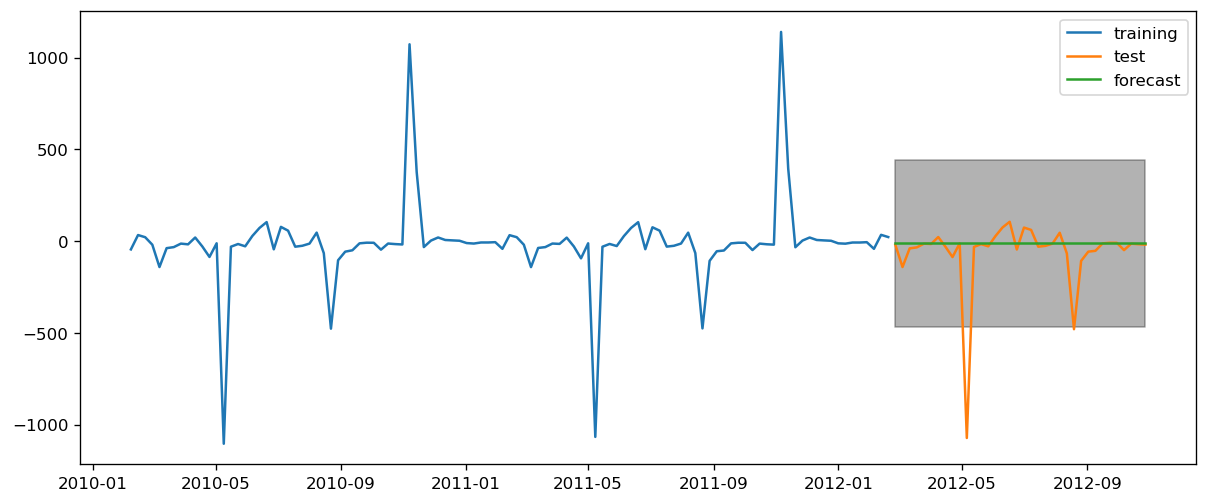

In [106]:
#plot
plt.figure(figsize=(12,5))
#data training
plt.plot(train,label='training')
#data actual
plt.plot(test,label='test')
#data forecast
plt.plot(fc_series,label='forecast')

plt.fill_between(lower_series.index,lower_series,upper_series,color='black', alpha=0.3)
plt.legend()

In [107]:
def forecast_metrics(forecast,actual):
    
    ## MAPE evaluation
    mape = np.mean(np.abs(fc-test)/np.abs(test))

    ## correlation evaluation use pearson
    corr = np.corrcoef(fc,test)[0][1]

    ## MinMax evaluation
    mins = np.amin(np.hstack([fc[:,None],test[:,None]]),axis=1)
    maxs = np.amax(np.hstack([fc[:,None],test[:,None]]),axis=1)
    minmax = 1-np.mean(mins/maxs)
    
    return ({'MAPE': mape, 'Correlation': corr, 'MinMax': minmax})

In [108]:
forecast_metrics(fc,test)

{'MAPE': 0.6686614777623358,
 'Correlation': 2.245285112201572e-17,
 'MinMax': -4.7745915203377916}

## Sedangkan untuk perhitungan matriks menggunakan data yang sudah melalui tahapan deseason, jika kita melakukan testing menggunakan sampling test 25% maka didapatkan hasil:
- MAPE sebesar 66%, yang dimana tingkat akurasi peramalannya hanya di persentase 40% dimana dapat siasumsikan jika model kurang baik.
- Tapi nilai kolerasi angkanya lebih kecil jika dibandingkan dengan pengujian menggunakan data original dan siginificance level 5%.
- Nilai MinMax (represent error value) juga lebih kecil, jika dibandingkan dengan pengujian menggunakan data original.

## Try to Predict Sales Weekly Target for The Next Week based on Data Record
##### Based original dataset

In [118]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# seasonal difference
weeks_in_year = 52

# fit model
model = ARIMA(y_deseason.diff().dropna(), order=(2,0,0))#ARIMA with best models
model_final = model.fit()

# multi-step out-of-sample forecast
forecast = model_final.forecast(steps=9)[0]

# invert the differenced forecast to something usable
history = [x for x in y]
fc = []
wtarget = []
data_wtarget = {'week': wtarget,'prediksi_sales_target':fc}
week = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, weeks_in_year)
    print('Week %d: %f' % (week, inverted))
    history.append(inverted)
    fc.append(round(inverted))
    wtarget.append(week)
    week += 1

Week 1: 48655546.260857
Week 2: 48474224.235925
Week 3: 46438980.151784
Week 4: 66593605.555464
Week 5: 49390556.368871
Week 6: 55561147.589723
Week 7: 60085695.951972
Week 8: 76998241.251917
Week 9: 46042460.982537


In [120]:
data_wtarget

{'week': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'prediksi_sales_target': [48655546.0,
  48474224.0,
  46438980.0,
  66593606.0,
  49390556.0,
  55561148.0,
  60085696.0,
  76998241.0,
  46042461.0]}

In [87]:
fc

[48655546.0,
 48474224.0,
 46438980.0,
 66593606.0,
 49390556.0,
 55561148.0,
 60085696.0,
 76998241.0]

In [88]:
wtarget

[1, 2, 3, 4, 5, 6, 7, 8]

In [89]:
data_wtarget = pd.DataFrame(data_wtarget)
data_wtarget

,week,prediksi_sales_target
0,1,48655546.0
1,2,48474224.0
2,3,46438980.0
3,4,66593606.0
4,5,49390556.0
5,6,55561148.0
6,7,60085696.0
7,8,76998241.0


##### based deseason dataset

In [90]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# seasonal difference
weeks_in_year = 52

# fit model
model = ARIMA(y.diff().dropna(), order=(2,0,0))#ARIMA with best models
model_final = model.fit()

# multi-step out-of-sample forecast
forecast = model_final.forecast(steps=8)[0]

# invert the differenced forecast to something usable
history = [x for x in y_deseason]
week = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, weeks_in_year)
    print('Week %d: %f' % (week, inverted))
    history.append(inverted)
    week += 1

Week 1: -76543.014392
Week 2: -84271.815826
Week 3: 5154.704997
Week 4: -36838.874971
Week 5: -32159.893615
Week 6: -27137.381002
Week 7: -30370.537814
Week 8: -29689.957455


In [91]:
forecast

array([-77683.38798889, -84667.93143659,   5187.62363252, -36842.37889023,
       -32179.99994293, -27143.97890599, -30374.90839829, -29692.38256322])

## Export Dataset for Visualization on Dashboard

In [92]:
df.to_csv('data_visual.csv', index=True)

## Export Model

In [93]:
import pickle

In [94]:
filename = 'final_model.sav'
pickle.dump(model_final, open(filename, 'wb'))

## What to do next?
- How to breakdown the predict weekly sales result to each department in each Store.